In [1]:
import copy
import itertools
import matplotlib.pyplot as plt
import autograd.numpy as np
from sklearn import datasets, preprocessing
import pandas as pd
from pymanopt.solvers import TrustRegions
from manopt_dr.core import gen_ldr
from manopt_dr.predefined_func_generator import *

In [2]:
# Generate data

"""
Number of Instances: 214
Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps
Class Distribution: (out of 214 total instances)
    -- 163 Window glass (building windows and vehicle windows)
       -- 87 float processed  
          -- 70 building windows
          -- 17 vehicle windows
       -- 76 non-float processed
          -- 76 building windows
          -- 0 vehicle windows
    -- 51 Non-window glass
       -- 13 containers
       -- 9 tableware
       -- 29 headlamps

"""

X = pd.read_csv("glass.data", header = None,usecols=[ 1,2,3,4,5,6,7,8,9],delim_whitespace=False)
y = pd.read_csv("glass.data", header = None,usecols=[ 10],delim_whitespace=False)


n_samples, n_features = X.shape
X = X.values.tolist()
y = y.values.tolist()
"""
print(n_samples)
print(n_features)
print(X)
print(y)
"""
mapped = []
for j in y:
    mapped.append(j[0])
y = mapped
"""
print(X)
print(y)
d = dict([(b,a) for a,b in enumerate(sorted(set(y)))])
y = [d[i] for i in y]
"""
n_components = 2
X = preprocessing.scale(X)


In [3]:
"""
# ccPCA
X_tg = X[y == 2, :]
X_bg = X[y != 2, :]
CCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)
ccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)
Z = ccpca.transform(X)
cost = ccpca.get_final_cost()
contrastiveness = 1 / cost

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)
plt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)
plt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title(
    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'
)
plt.show()
"""

"\n# ccPCA\nX_tg = X[y == 2, :]\nX_bg = X[y != 2, :]\nCCPCA = gen_ldr(gen_cost_ccpca, gen_default_proj)\nccpca = CCPCA(n_components=n_components).fit(X_tg, X_bg)\nZ = ccpca.transform(X)\ncost = ccpca.get_final_cost()\ncontrastiveness = 1 / cost\n\n# Plot\nplt.figure(figsize=(6, 6))\nplt.scatter(Z[y == 0, 0], Z[y == 0, 1], c='r', label=0)\nplt.scatter(Z[y == 1, 0], Z[y == 1, 1], c='g', label=1)\nplt.scatter(Z[y == 2, 0], Z[y == 2, 1], c='b', label=2)\nplt.legend(loc='best', shadow=False, scatterpoints=1)\nplt.title(\n    f'ccPCA of Wine dataset (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})'\n)\nplt.show()\n"

In [4]:
GCPCA = gen_ldr(gen_cost_gcpca, gen_default_proj)
def return_partition(my_list):
    filtered=[]
    for l in range(1,len(my_list)):
        for c in itertools.combinations(my_list,l):
            tmp = []
            rec = [m for m in my_list if m not in c]
            tmp.append(c)
            tmp.append(rec)
            filtered.append(tmp)
    return filtered

partitions = return_partition([1,2,3,4,5,6,7,8])

def Trials(par,index):    
    g1 = par[0]
    g2 = par[1]
    print(par[0])
    print(par[1])
    y_tg = copy.deepcopy(y)
    y_tg = np.asarray(y_tg)

    for i in g1:
        y_tg[y_tg == i] = -1

    y_bg = copy.deepcopy(y)
    y_bg = np.asarray(y_bg)

    for i in g2:
        y_bg[y_bg == i] = -1

    gcpca = GCPCA(n_components=n_components).fit(X, y_tg, y_bg)
    Z = gcpca.transform(X)
    cost = gcpca.get_final_cost()
    contrastiveness = 1 / cost

    # Plot
    print(Z)
    plt.figure(figsize=(10, 10))

    tg_x = [Z[i][0] for i in range(len(y)) if y[i] in g1]
    tg_y = [Z[i][1] for i in range(len(y)) if y[i] in g1]
    bg_x = [Z[i][0] for i in range(len(y)) if y[i] in g2]
    bg_y = [Z[i][1] for i in range(len(y)) if y[i] in g2]

    #for i in range(len(Z)):
    #    if y[i] in g1:
    #        plt.plot(Z[i][0], Z[i][1],  'ro')
    #    else:
    #        plt.plot(Z[i][0], Z[i][1],  'ko')

    plt.scatter(tg_x, tg_y, c='r', label = 0)
    plt.scatter(bg_x, bg_y, c='black', label = 1)

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(
        f'Generalized cPCA of Yeast dataset Trial({index})  (cost: {cost:.3f}, contrastiveness: {contrastiveness:.3f})' ,
        fontsize=8)
    plt.show()
    plt.clf()
    

(1,)
[2, 3, 4, 5, 6, 7, 8]
[[-7.13149626e-02 -6.45749236e-02]
 [-8.88573846e-02 -8.49995779e-02]
 [ 1.91005311e-01  1.36026367e-02]
 [-3.15229538e-01 -2.54221746e-02]
 [-1.46692639e-01 -6.86515991e-02]
 [-1.54460692e-01 -8.31554132e-02]
 [-1.97043985e-01 -9.84073746e-02]
 [-1.91186776e-01 -8.27288373e-02]
 [-3.44027001e-01 -1.63095668e-01]
 [-1.21755233e-01 -1.20149117e-01]
 [-1.24689737e-01 -6.48766031e-02]
 [-1.84593326e-01 -1.11377150e-01]
 [-1.87995178e-01 -8.31163037e-02]
 [-8.66794590e-02 -7.21065233e-02]
 [-8.37126802e-02 -7.08380402e-02]
 [-1.36723976e-01 -4.43635495e-02]
 [-2.09941862e-01 -1.23689788e-01]
 [-2.40688387e-01 -5.88892342e-02]
 [ 2.85829529e-01  2.99125854e-03]
 [ 1.58276775e-02 -1.12312851e-01]
 [-1.26538067e-01 -4.08332338e-02]
 [-1.48641423e-02 -3.76091710e-02]
 [-2.04976143e-01 -7.27518359e-02]
 [-1.44091462e-01 -1.26360308e-01]
 [-9.70080824e-02 -5.40134866e-02]
 [-2.50503856e-01 -1.25982214e-01]
 [-2.13080749e-01 -6.37316487e-02]
 [-9.95001023e-02 -1.3464827

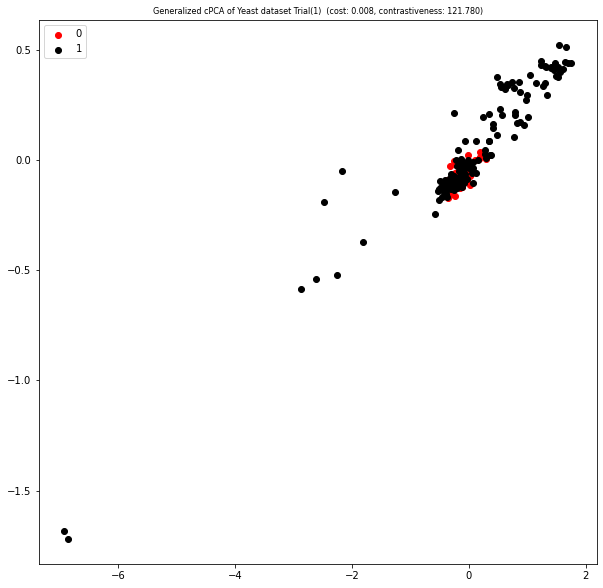

(2,)
[1, 3, 4, 5, 6, 7, 8]
[[-5.30713590e-01  2.79360877e-01]
 [-4.56019882e-02  2.86324477e-02]
 [-2.67988794e-01  1.30904091e-01]
 [ 2.86396111e-02 -1.21545862e-01]
 [ 3.15829575e-02 -3.17580790e-02]
 [-1.02609560e-01  4.42743205e-02]
 [ 1.27788798e-01 -6.14468755e-02]
 [ 1.29183617e-01 -7.35495993e-02]
 [ 1.07885292e-01 -4.06176539e-02]
 [-1.09342544e-02  5.51421233e-02]
 [-3.60929853e-02  3.27992806e-03]
 [ 7.94501137e-02 -6.40352784e-03]
 [ 6.53915454e-02 -5.06530414e-02]
 [-6.34423879e-02  4.07040133e-02]
 [ 2.61858920e-03  1.92532432e-02]
 [ 4.19218594e-02 -4.81458423e-02]
 [ 1.29553625e-01 -2.19757760e-02]
 [-1.99552233e-01  5.44782653e-02]
 [-4.56029561e-01  2.86747457e-01]
 [-1.44209072e-01  1.57405819e-01]
 [-1.47331387e-01  4.09466946e-02]
 [-5.13234090e-02  3.57224499e-02]
 [ 6.97503535e-02 -4.16639937e-02]
 [ 9.00953659e-02  1.60767806e-02]
 [ 5.89854265e-02 -3.37216982e-02]
 [ 1.92757594e-01 -7.11487170e-02]
 [ 4.52696113e-02 -5.72896827e-02]
 [-4.35190642e-03 -4.3195231

<Figure size 432x288 with 0 Axes>

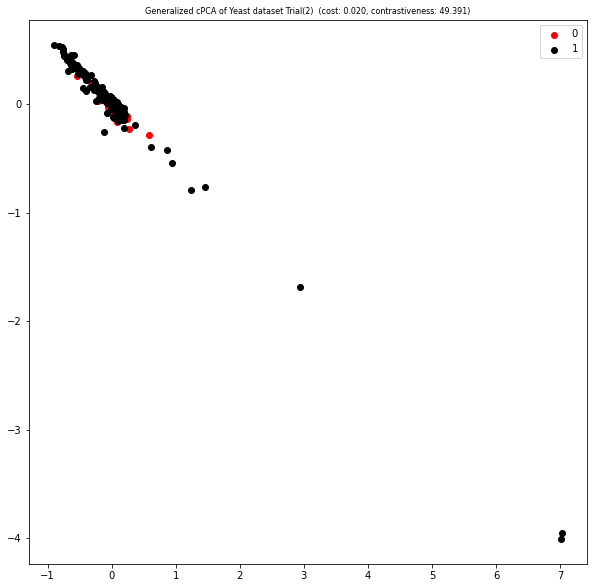

(3,)
[1, 2, 4, 5, 6, 7, 8]
[[-5.59800576e-01  2.86179708e-01]
 [-4.51023060e-01  4.77128592e-01]
 [-2.98821208e-01  2.84648745e-01]
 [-3.66729498e-01  3.42388136e-01]
 [-3.90428771e-01  5.03997729e-01]
 [-1.05587404e-01  1.73869661e-01]
 [-3.65296816e-01  5.00444194e-01]
 [-3.55001428e-01  5.38990333e-01]
 [-4.35544469e-01  4.48608313e-01]
 [-2.19040936e-01  3.89563648e-01]
 [-5.68785910e-02  2.17509839e-01]
 [-2.78576624e-01  4.08749487e-01]
 [-8.60220594e-02  2.94821580e-01]
 [-1.53487332e-01  4.05034173e-01]
 [-2.72470197e-01  4.96865231e-01]
 [-2.84398122e-01  5.00889934e-01]
 [-2.60660576e-01  4.40718532e-01]
 [-3.10764264e-01  2.50862608e-01]
 [-1.10297690e-01  6.20089639e-02]
 [-1.82045525e-01  2.74375940e-01]
 [-7.21986790e-02  2.09821253e-01]
 [-1.16091193e-01  8.18262735e-02]
 [-1.80340206e-01  2.43189420e-01]
 [-2.38817477e-01  4.00876138e-01]
 [-1.89497448e-01  2.80371741e-01]
 [-2.66946259e-01  4.41350794e-01]
 [-2.66243600e-01  3.67760335e-01]
 [-2.01488844e-01  3.4976254

<Figure size 432x288 with 0 Axes>

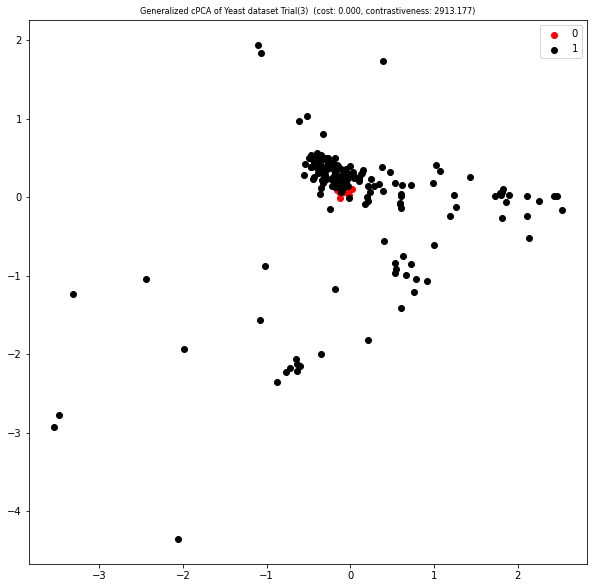

(4,)
[1, 2, 3, 5, 6, 7, 8]
[[ 3.13672220e-01 -1.17241049e+00]
 [-2.16517178e-01 -6.77521519e-01]
 [ 1.79137143e-01 -5.54692939e-01]
 [ 1.42380720e-01 -6.95594633e-01]
 [ 1.14473298e-01 -5.56919248e-01]
 [ 1.87534205e-02  4.68226482e-01]
 [ 1.02167268e-01 -5.22868853e-01]
 [ 1.91628739e-01 -4.61543574e-01]
 [-3.89991288e-01 -8.64617759e-01]
 [ 1.51528668e-01 -1.17771600e-01]
 [ 7.23592170e-02  5.28435810e-01]
 [ 4.38202058e-01 -5.81421255e-01]
 [-6.07531551e-02  5.84579313e-01]
 [ 1.45835684e-01  2.51323448e-01]
 [ 5.21077433e-01 -4.88766747e-01]
 [ 3.79909548e-01 -4.58164715e-01]
 [ 5.10180651e-01 -5.33279744e-01]
 [-1.74736388e-01 -9.27077566e-01]
 [ 3.66202264e-01 -6.67974124e-01]
 [ 2.66254976e-01 -3.90532695e-01]
 [ 1.70755098e-01  1.99860963e-01]
 [-5.92466180e-02 -4.70844045e-01]
 [ 5.22578073e-01 -5.82625112e-01]
 [ 4.31236818e-01 -5.60107674e-01]
 [ 2.35472958e-01 -4.71958559e-01]
 [ 2.79064723e-01 -5.29257765e-01]
 [ 1.47067522e-01 -6.28064225e-01]
 [ 4.18255175e-01 -4.7205195

c:\users\hector-wei\appdata\local\programs\python\python38\lib\site-packages\pymanopt\solvers\trust_regions.py:447: RuntimeWarning: invalid value encountered in true_divide
  alpha = z_r / d_Hd
c:\users\hector-wei\appdata\local\programs\python\python38\lib\site-packages\pymanopt\solvers\trust_regions.py:459: RuntimeWarning: invalid value encountered in double_scalars
  tau = ((-e_Pd +
<ipython-input-4-d34a314c30ca>:35: RuntimeWarning: divide by zero encountered in double_scalars
  contrastiveness = 1 / cost


<Figure size 432x288 with 0 Axes>

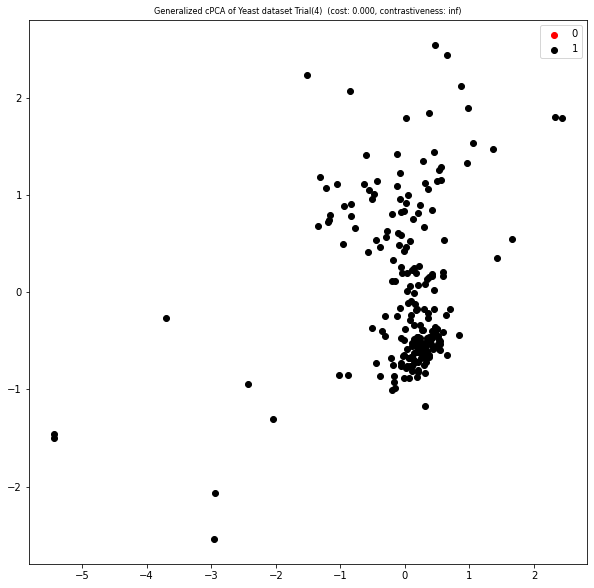

(5,)
[1, 2, 3, 4, 6, 7, 8]
[[-6.20700966e-01 -2.73259384e-01]
 [-4.98078086e-01 -1.77922802e-01]
 [-7.29241937e-02 -2.29727439e-02]
 [-3.05976978e-01 -2.35655943e-01]
 [-5.09701159e-01 -2.27653137e-01]
 [ 2.22815529e-01  1.34263194e-01]
 [-6.49123221e-01 -2.74968165e-01]
 [-7.45428135e-01 -3.35733195e-01]
 [-4.36422065e-01 -1.34515385e-01]
 [-2.20125309e-01 -2.69099136e-02]
 [ 1.53717451e-01  9.07624317e-02]
 [-2.73709798e-01 -9.67764358e-02]
 [-1.45952813e-01 -4.02823650e-02]
 [-3.14243162e-01 -1.05506610e-01]
 [-2.09714278e-01 -7.94120401e-02]
 [-3.63114710e-01 -1.89587154e-01]
 [-4.00893527e-01 -1.50826962e-01]
 [-9.19947711e-01 -4.46496719e-01]
 [-3.89940862e-01 -1.37001891e-01]
 [ 3.02212202e-01  2.37407324e-01]
 [ 1.27587792e-01  4.86477329e-02]
 [-1.81294864e+00 -8.26897765e-01]
 [-1.27176266e-01 -8.39020333e-02]
 [-1.58209457e-01 -1.47831090e-02]
 [-4.94511732e-01 -2.30894966e-01]
 [-4.07729205e-01 -1.56000195e-01]
 [-1.21822016e-01 -7.60113967e-02]
 [-1.47839832e-01 -1.1781102

<Figure size 432x288 with 0 Axes>

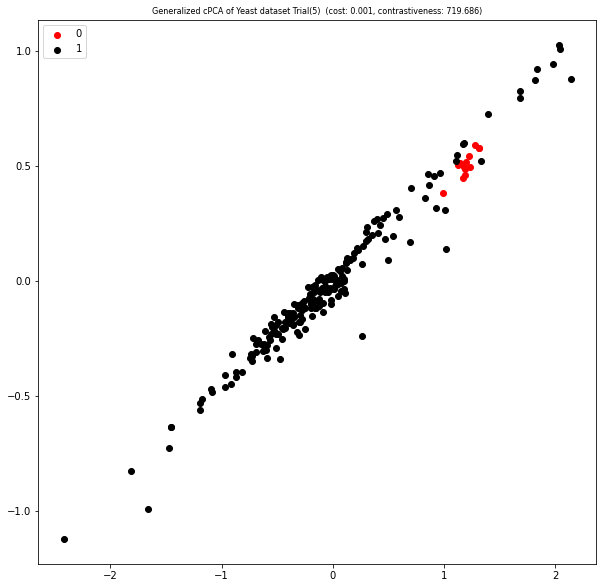

(6,)
[1, 2, 3, 4, 5, 7, 8]
[[ 2.03467680e-01  6.37057613e-01]
 [-3.18928735e-01  5.07938627e-01]
 [-2.06867426e-01  5.35790263e-01]
 [-4.30333572e-01  4.81771868e-01]
 [-4.05920595e-01  4.86609594e-01]
 [ 1.89836242e-01 -2.11789737e+00]
 [-4.43303084e-01  4.77158176e-01]
 [-4.30862979e-01  4.80257920e-01]
 [-4.18398913e-01  4.83499228e-01]
 [-1.31642145e-01 -6.10475615e-01]
 [ 9.80877914e-02 -1.92889905e+00]
 [-4.68205612e-01  4.70866467e-01]
 [ 7.31612315e-02 -1.93515510e+00]
 [ 6.90375542e-02 -1.19568710e+00]
 [-4.43351648e-01  4.77019288e-01]
 [-4.43193411e-01  4.77504575e-01]
 [-4.80707755e-01  4.67608586e-01]
 [ 9.17049490e-02  6.09973872e-01]
 [ 2.03343916e-01  6.36478362e-01]
 [-2.03203868e-01 -2.04899321e-01]
 [ 1.23760192e-01 -1.39312495e+00]
 [ 2.40704970e-01  6.45794909e-01]
 [-4.55525397e-01  4.74553699e-01]
 [-4.93172192e-01  4.64441413e-01]
 [-3.43685747e-01  5.01947081e-01]
 [-5.30386090e-01  4.55545097e-01]
 [-4.55494715e-01  4.74805447e-01]
 [-4.18161238e-01  4.8402244

<Figure size 432x288 with 0 Axes>

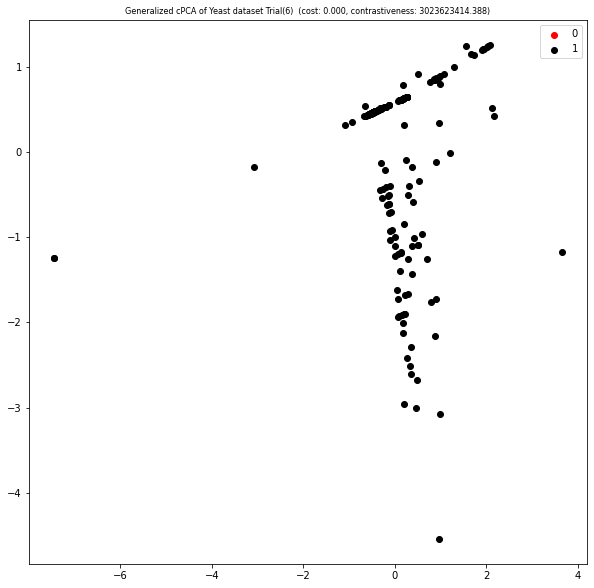

(7,)
[1, 2, 3, 4, 5, 6, 8]
[[ 0.29904834  0.45757194]
 [ 0.35575421  0.60860685]
 [ 0.40561914  0.58923336]
 [ 0.40445841  0.43869173]
 [ 0.35108461  0.54480834]
 [-1.10006079 -1.67264745]
 [ 0.32416627  0.53849152]
 [ 0.32412995  0.52331239]
 [ 0.30627774  0.55586391]
 [-0.32472586 -0.38500915]
 [-0.98349931 -1.50393518]
 [ 0.29535837  0.49031557]
 [-0.99567922 -1.49328992]
 [-0.63710691 -0.90660155]
 [ 0.3147711   0.50872626]
 [ 0.34547072  0.49485951]
 [ 0.27348862  0.47700464]
 [ 0.29534163  0.41035457]
 [ 0.30089983  0.49116096]
 [-0.09381847 -0.02914585]
 [-0.71290843 -1.13633153]
 [ 0.25931989  0.4287283 ]
 [ 0.32321982  0.42626182]
 [ 0.2812339   0.5110308 ]
 [ 0.33272394  0.48719125]
 [ 0.29247358  0.49708448]
 [ 0.35437407  0.48422661]
 [ 0.37011886  0.46577904]
 [ 0.35142264  0.47971967]
 [ 0.33438579  0.48238912]
 [-0.50944908 -0.68649099]
 [ 0.31293505  0.4916886 ]
 [-0.94032739 -1.3773478 ]
 [-0.04948419  0.03731999]
 [ 0.31004321  0.4621588 ]
 [ 0.31409781  0.44318657]
 

<Figure size 432x288 with 0 Axes>

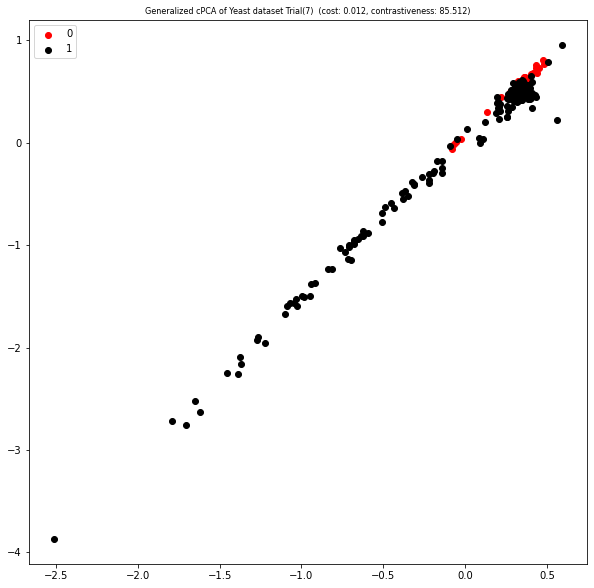

(8,)
[1, 2, 3, 4, 5, 6, 7]
[[ 3.22334987e-01 -1.01733808e+00]
 [ 3.67300632e-01 -1.12105293e+00]
 [ 1.35335914e-01 -9.69806430e-01]
 [ 4.76942424e-01 -5.21714106e-01]
 [ 5.15797935e-01 -6.30626727e-01]
 [-1.62338039e+00  2.22364374e-01]
 [ 6.55623128e-01 -6.24797447e-01]
 [ 7.47136909e-01 -5.22753705e-01]
 [ 3.79937777e-01 -9.78061078e-01]
 [-3.72541845e-01 -1.29612960e-01]
 [-1.38515855e+00  2.59959703e-01]
 [ 4.73588900e-01 -1.56526598e-01]
 [-1.17721099e+00  1.37932888e-01]
 [-6.78382335e-01  4.19048043e-02]
 [ 4.04720880e-01 -3.38043743e-02]
 [ 5.26037112e-01 -1.98954953e-01]
 [ 5.97897870e-01 -4.75258573e-02]
 [ 7.38016798e-01 -1.23117346e+00]
 [ 3.83813931e-01 -1.11215675e+00]
 [-5.03945041e-01 -1.65916835e-01]
 [-1.05855310e+00  1.88022339e-01]
 [ 1.50476227e+00 -1.83170944e+00]
 [ 4.75825082e-01 -1.12678270e-01]
 [ 3.95965097e-01 -1.22348445e-01]
 [ 6.50383231e-01 -6.55451168e-01]
 [ 5.93593220e-01 -2.45107752e-01]
 [ 3.48575329e-01 -3.94656657e-01]
 [ 4.29645646e-01 -2.3054486

<Figure size 432x288 with 0 Axes>

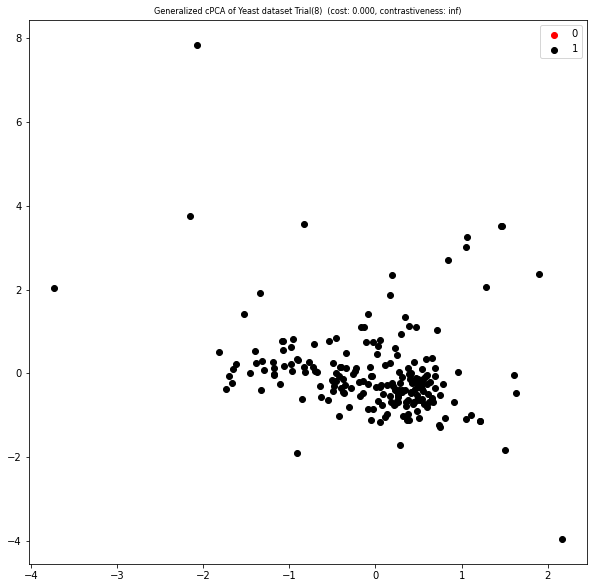

(1, 2)
[3, 4, 5, 6, 7, 8]
[[ 2.98445411e-01  3.09143677e-01]
 [ 2.34720320e-03 -6.81442339e-03]
 [ 2.05342324e-01  2.20420550e-01]
 [-1.49737384e-01 -1.29275811e-02]
 [-5.41156908e-02 -3.63364502e-02]
 [ 8.45918874e-02  9.52784329e-02]
 [-1.08919995e-01 -1.16659958e-01]
 [-1.17679575e-01 -1.11005382e-01]
 [-1.43795052e-01 -1.67678892e-01]
 [ 4.51954307e-02 -1.80743368e-02]
 [ 4.08885539e-02  5.83866469e-02]
 [-3.23510623e-02 -7.35249838e-02]
 [-4.59027396e-02 -2.94959359e-02]
 [ 5.20342237e-02  4.01328623e-02]
 [ 2.32283911e-02 -2.05469991e-03]
 [-5.78076587e-02 -2.50588702e-02]
 [-6.02249592e-02 -1.14507518e-01]
 [-2.77228537e-02  4.32256268e-02]
 [ 3.46531324e-01  3.00790528e-01]
 [ 1.86502204e-01  8.48126462e-02]
 [ 7.22688203e-02  1.18682072e-01]
 [-4.04750406e-02 -3.45082901e-02]
 [-5.72842150e-02 -4.32290846e-02]
 [-8.24966124e-03 -8.54812812e-02]
 [-5.50202367e-02 -4.60077167e-02]
 [-1.28496207e-01 -1.65110288e-01]
 [-8.77565726e-02 -4.50554523e-02]
 [-3.31361602e-02  2.71989300

<Figure size 432x288 with 0 Axes>

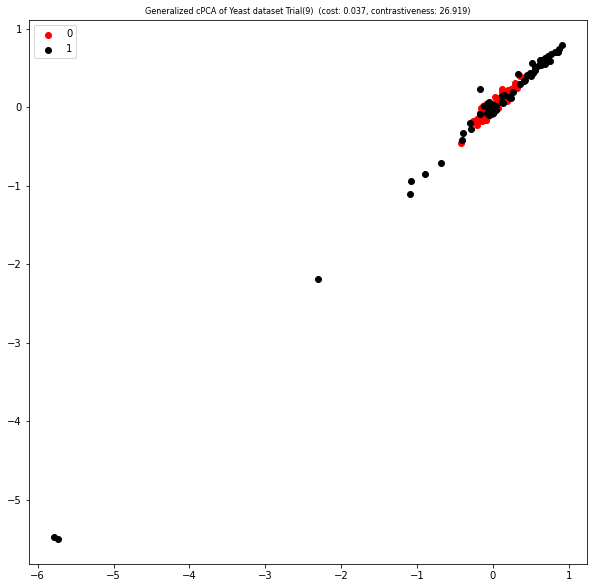

(1, 3)
[2, 4, 5, 6, 7, 8]
[[ 2.59340747e-01  6.80572666e-02]
 [ 2.04503489e-01  1.13624775e-01]
 [ 7.00044516e-02 -1.35304873e-01]
 [ 2.13760229e-01  3.03470925e-01]
 [ 2.27178071e-01  1.78392010e-01]
 [ 2.17907521e-01  8.50398614e-02]
 [ 2.64205885e-01  2.24941583e-01]
 [ 2.60276415e-01  2.36313312e-01]
 [ 2.88139392e-01  2.75823394e-01]
 [ 2.51729615e-01  9.07711415e-02]
 [ 1.90744994e-01  7.71317571e-02]
 [ 2.75496968e-01  1.64391075e-01]
 [ 2.22154797e-01  1.58552474e-01]
 [ 2.08259015e-01  8.23310731e-02]
 [ 2.21562734e-01  8.99642420e-02]
 [ 2.03225097e-01  1.58703991e-01]
 [ 3.00154095e-01  1.94835004e-01]
 [ 1.92328572e-01  2.07648283e-01]
 [ 5.16519871e-02 -2.57385912e-01]
 [ 1.90999343e-01 -8.39528145e-02]
 [ 1.62892113e-01  6.45079219e-02]
 [ 1.71669308e-01  1.20734577e-01]
 [ 2.34834441e-01  1.68415506e-01]
 [ 2.66629928e-01  1.11489339e-01]
 [ 1.86161908e-01  1.16675851e-01]
 [ 2.86613210e-01  2.29297670e-01]
 [ 1.94985554e-01  1.75459406e-01]
 [ 1.52628486e-01  1.05917721

<Figure size 432x288 with 0 Axes>

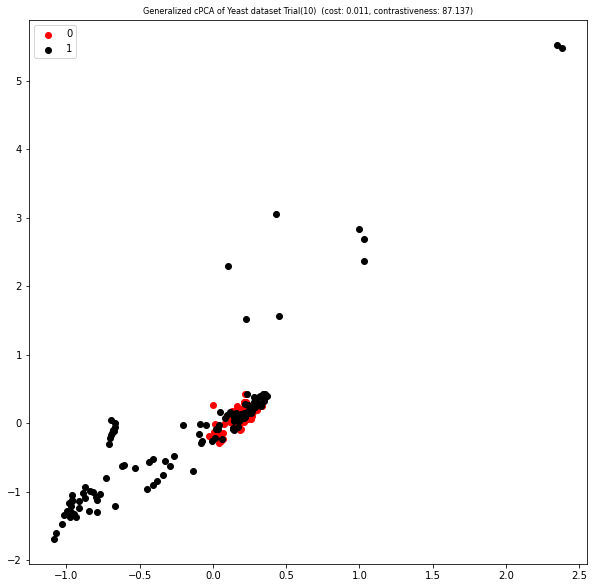

(1, 4)
[2, 3, 5, 6, 7, 8]
[[ 9.36637481e-02  2.19833471e-02]
 [ 1.20438132e-01  2.48103134e-02]
 [-1.19737648e-01 -1.49433912e-01]
 [ 2.00061336e-01  2.44933114e-01]
 [ 1.39853615e-01  8.16890474e-02]
 [ 1.56202663e-01  7.98388296e-02]
 [ 1.92951580e-01  1.06209596e-01]
 [ 1.76722153e-01  1.10299964e-01]
 [ 3.29708165e-01  1.90390078e-01]
 [ 1.68055567e-01  3.19044186e-02]
 [ 1.24243560e-01  6.57299581e-02]
 [ 1.96547985e-01  8.85943927e-02]
 [ 1.75227402e-01  1.07453882e-01]
 [ 1.08591442e-01  3.03450562e-02]
 [ 1.05861665e-01  2.86247799e-02]
 [ 1.14203457e-01  8.72891298e-02]
 [ 2.21084382e-01  1.02454635e-01]
 [ 1.85237893e-01  1.64579557e-01]
 [-1.64894032e-01 -2.33488271e-01]
 [ 8.34208362e-02 -7.68491511e-02]
 [ 1.05510409e-01  8.09144844e-02]
 [ 3.93939435e-02 -9.14226944e-03]
 [ 1.76349411e-01  1.27316475e-01]
 [ 1.85859676e-01  4.67535484e-02]
 [ 9.95736088e-02  4.91259368e-02]
 [ 2.46021589e-01  1.34527469e-01]
 [ 1.73533057e-01  1.39111262e-01]
 [ 6.76252505e-02  7.42198681

<Figure size 432x288 with 0 Axes>

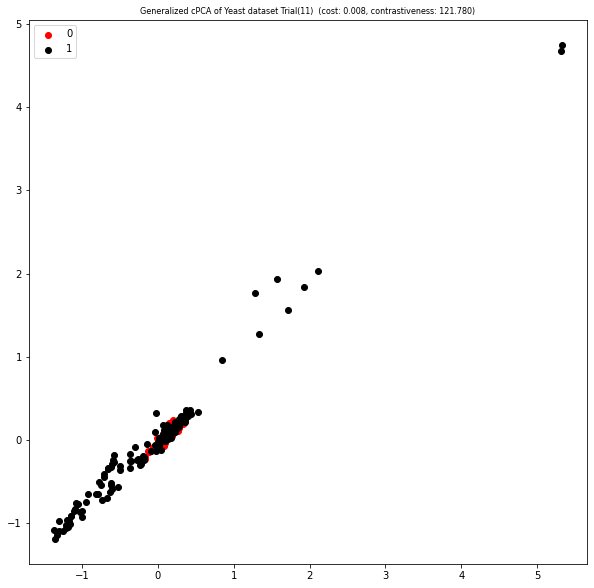

(1, 5)
[2, 3, 4, 6, 7, 8]
[[-5.73229752e-02 -1.13880765e+00]
 [-1.24373332e-02 -1.03401514e+00]
 [-4.37198266e-02 -1.02416278e+00]
 [-1.29275372e-01 -8.39556084e-01]
 [-3.88846514e-02 -8.52435261e-01]
 [-1.94397214e-02 -7.86513768e-01]
 [-2.02848551e-02 -8.19839895e-01]
 [-3.20612845e-02 -7.72378166e-01]
 [ 6.46373487e-03 -8.78119857e-01]
 [ 2.69036305e-02 -6.97544367e-01]
 [-2.32140057e-02 -7.00758109e-01]
 [-4.31711427e-03 -6.44668740e-01]
 [-1.79648702e-02 -7.15907585e-01]
 [-4.97661077e-03 -6.59932025e-01]
 [-1.35568523e-02 -5.85742993e-01]
 [-5.20375616e-02 -6.33384680e-01]
 [ 4.16524104e-03 -5.80077413e-01]
 [-7.45814259e-02 -8.55614158e-01]
 [-8.54166715e-03 -8.85186917e-01]
 [ 4.97811035e-02 -6.83147311e-01]
 [-4.83100487e-02 -6.25363586e-01]
 [-4.25240381e-02 -1.03816808e+00]
 [-4.89876288e-02 -6.11881244e-01]
 [ 2.41952610e-02 -5.97713354e-01]
 [-3.81931575e-02 -7.63405437e-01]
 [-1.01374737e-03 -6.23650818e-01]
 [-5.40190228e-02 -6.74455237e-01]
 [-7.50145267e-02 -6.35629400

<Figure size 432x288 with 0 Axes>

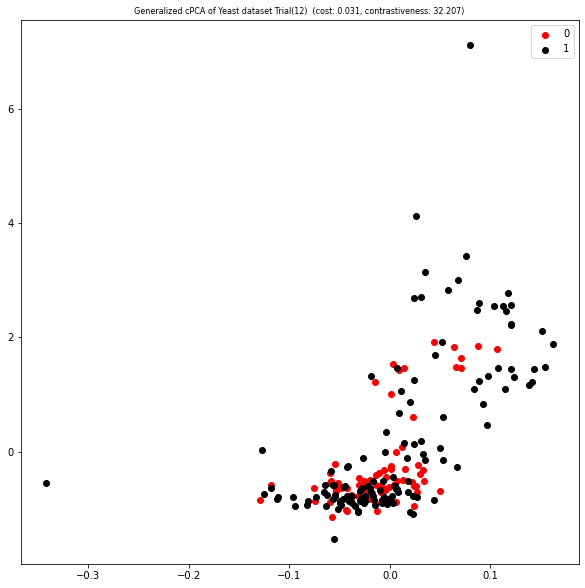

(1, 6)
[2, 3, 4, 5, 7, 8]
[[ 1.52795160e-01 -2.40711829e-01]
 [-6.49038025e-03 -5.81711939e-02]
 [ 1.74961269e-01 -3.04711073e-01]
 [ 4.20141820e-02  9.52074659e-02]
 [ 1.38459246e-02 -4.07628387e-02]
 [ 2.60236450e-02 -5.27948127e-02]
 [-3.28192465e-02 -2.30909810e-03]
 [-1.33786676e-02 -1.41236574e-02]
 [-1.44243524e-01  1.57882689e-01]
 [-2.02825937e-02 -8.43286648e-02]
 [ 3.16104572e-02 -5.78350285e-02]
 [-1.12984575e-02 -5.46982711e-02]
 [-1.75073784e-02  7.24222193e-03]
 [ 3.14297753e-02 -1.04872649e-01]
 [ 4.54568676e-02 -1.27510537e-01]
 [ 4.63431410e-02 -5.90240047e-02]
 [-2.81091234e-02 -4.48355265e-02]
 [ 2.32772108e-02  2.60747923e-02]
 [ 2.15568273e-01 -4.37622780e-01]
 [ 2.58881194e-02 -1.95372688e-01]
 [ 7.07028427e-02 -6.90815001e-02]
 [ 6.56866009e-02 -1.68222805e-01]
 [ 2.99789915e-02 -3.56094849e-02]
 [-2.67609968e-02 -7.86477956e-02]
 [ 3.55990515e-02 -8.13633217e-02]
 [-6.44688160e-02  2.77176700e-02]
 [ 2.81978119e-03  3.00889833e-02]
 [ 8.80882973e-02 -8.15788886

<Figure size 432x288 with 0 Axes>

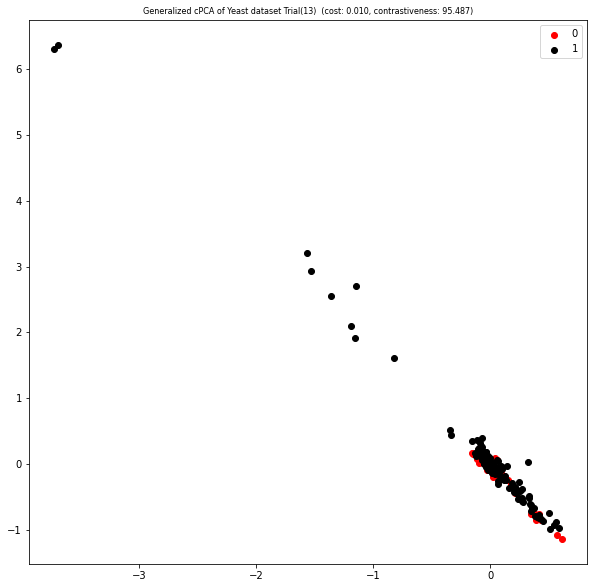

(1, 7)
[2, 3, 4, 5, 6, 8]
[[-8.60613102e-01 -1.43192671e-01]
 [-9.72914992e-01 -2.35765920e-01]
 [-9.94052863e-01 -1.88520716e-01]
 [-6.10286831e-01 -2.43870701e-02]
 [-8.71459287e-01 -1.73597137e-01]
 [-6.23305701e-01 -1.19515239e-01]
 [-8.37850737e-01 -1.87030382e-01]
 [-8.75935089e-01 -1.79418895e-01]
 [-5.06511393e-01 -1.60481705e-01]
 [-6.23922361e-01 -1.73173746e-01]
 [-6.29148714e-01 -1.15485498e-01]
 [-5.06651739e-01 -1.15119395e-01]
 [-7.35958272e-01 -1.51292614e-01]
 [-7.49313896e-01 -1.61916896e-01]
 [-5.88212687e-01 -1.17307811e-01]
 [-6.65296509e-01 -1.01655656e-01]
 [-4.92408924e-01 -1.18074713e-01]
 [-4.83490675e-01 -5.98008411e-02]
 [-6.86719425e-01 -1.44756076e-01]
 [-3.95826882e-01 -1.41699220e-01]
 [-4.42198356e-01 -4.62331504e-02]
 [-1.06469986e+00 -2.19956646e-01]
 [-3.39511278e-01 -2.92905207e-02]
 [-4.31074310e-01 -1.26617075e-01]
 [-6.63235653e-01 -1.22653373e-01]
 [-4.96742469e-01 -1.23540755e-01]
 [-4.19744099e-01 -5.50750322e-02]
 [-5.40149984e-01 -4.82547600

<Figure size 432x288 with 0 Axes>

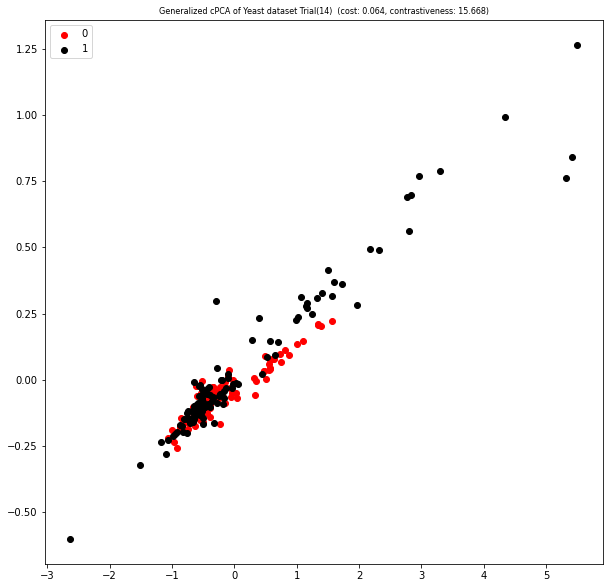

(1, 8)
[2, 3, 4, 5, 6, 7]
[[ 1.21117042e-02 -9.54456203e-02]
 [ 1.88132583e-02 -1.21520635e-01]
 [ 9.82082671e-02  1.64384666e-01]
 [-1.59642217e-01 -2.73005287e-01]
 [-2.77034386e-02 -1.59577351e-01]
 [-2.02601727e-02 -1.74251651e-01]
 [-3.21363286e-02 -2.17895305e-01]
 [-4.16369919e-02 -2.04116030e-01]
 [-6.32563223e-02 -3.75440733e-01]
 [ 2.87955783e-02 -1.68617218e-01]
 [-1.82008862e-02 -1.39377166e-01]
 [-1.43743009e-02 -2.15113681e-01]
 [-3.94922476e-02 -2.01721981e-01]
 [ 9.48981788e-03 -1.12352370e-01]
 [ 1.01484585e-02 -1.09193650e-01]
 [-4.19088299e-02 -1.37497797e-01]
 [-1.87928056e-02 -2.42945405e-01]
 [-8.95250344e-02 -2.31052938e-01]
 [ 1.61199946e-01  2.36052541e-01]
 [ 1.01143901e-01 -5.13314514e-02]
 [-3.89716194e-02 -1.27126660e-01]
 [ 2.23247318e-02 -3.37209985e-02]
 [-5.77123325e-02 -2.09710267e-01]
 [ 2.10992682e-02 -1.90486065e-01]
 [-1.12578795e-02 -1.10461366e-01]
 [-4.01372580e-02 -2.77513486e-01]
 [-6.97481052e-02 -2.11190483e-01]
 [-4.59292906e-02 -8.92884219

<Figure size 432x288 with 0 Axes>

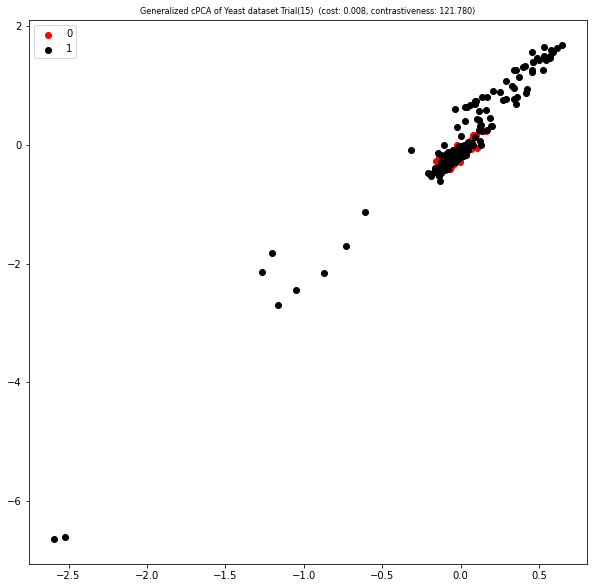

(2, 3)
[1, 4, 5, 6, 7, 8]
[[-3.01341256e-01 -4.55350716e-01]
 [-3.92413631e-03 -1.43035875e-02]
 [-1.58999878e-01 -2.54103848e-01]
 [ 1.17430102e-01  1.65972082e-02]
 [ 4.71773586e-02  4.75355029e-02]
 [-8.68559872e-02 -1.08296028e-01]
 [ 8.73858942e-02  1.41510070e-01]
 [ 1.01397426e-01  1.46488073e-01]
 [ 8.04208728e-02  1.28728083e-01]
 [-5.97701638e-02  5.61044980e-03]
 [-3.85141992e-02 -4.63103979e-02]
 [ 3.66387623e-04  7.59384101e-02]
 [ 4.02644855e-02  6.38191173e-02]
 [-4.62611856e-02 -3.74384204e-02]
 [-2.93595398e-02  7.44480422e-03]
 [ 4.99629507e-02  4.62297559e-02]
 [ 2.23821090e-02  1.28337690e-01]
 [-2.32824062e-02 -1.38772284e-01]
 [-3.18624905e-01 -4.07383807e-01]
 [-1.93556114e-01 -1.41822861e-01]
 [-7.81297079e-02 -1.45441277e-01]
 [ 1.91604784e-02  1.70012633e-02]
 [ 1.75491374e-02  4.50654069e-02]
 [-2.40570719e-02  8.39181561e-02]
 [ 3.68588895e-02  5.82347712e-02]
 [ 8.39440163e-02  1.87256977e-01]
 [ 5.47706721e-02  3.66018105e-02]
 [ 2.58663781e-02 -1.63042334

<Figure size 432x288 with 0 Axes>

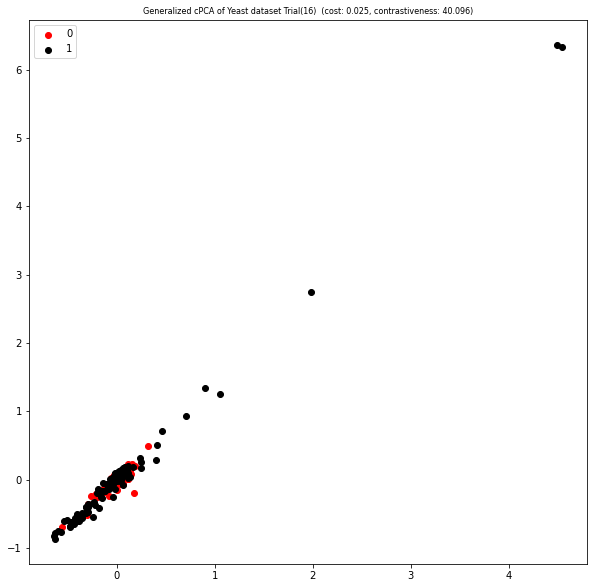

(2, 4)
[1, 3, 5, 6, 7, 8]
[[-5.60214003e-01  2.14148746e-01]
 [-4.86881753e-02  2.29960860e-02]
 [-2.81674750e-01  9.80469782e-02]
 [ 4.29151658e-02 -1.17268548e-01]
 [ 3.51413251e-02 -2.77695167e-02]
 [-1.07153175e-01  3.17353811e-02]
 [ 1.34198840e-01 -4.57861000e-02]
 [ 1.37025498e-01 -5.76364775e-02]
 [ 1.11955727e-01 -2.74762673e-02]
 [-1.74253544e-02  5.34468774e-02]
 [-3.62266951e-02 -1.04310904e-03]
 [ 7.96471817e-02  3.10679505e-03]
 [ 7.09600759e-02 -4.25023815e-02]
 [-6.78395920e-02  3.28564002e-02]
 [ 3.06344143e-04  1.94280863e-02]
 [ 4.73588422e-02 -4.28089301e-02]
 [ 1.31248990e-01 -6.38583735e-03]
 [-2.04621085e-01  3.03180887e-02]
 [-4.86941752e-01  2.30379675e-01]
 [-1.61933567e-01  1.39105600e-01]
 [-1.51160121e-01  2.31038355e-02]
 [-5.52134702e-02  2.93540190e-02]
 [ 7.42169985e-02 -3.30580900e-02]
 [ 8.75385969e-02  2.66951656e-02]
 [ 6.25825807e-02 -2.64547550e-02]
 [ 1.99860747e-01 -4.76792596e-02]
 [ 5.17720407e-02 -5.14888460e-02]
 [ 8.24839780e-04 -4.34060681

<Figure size 432x288 with 0 Axes>

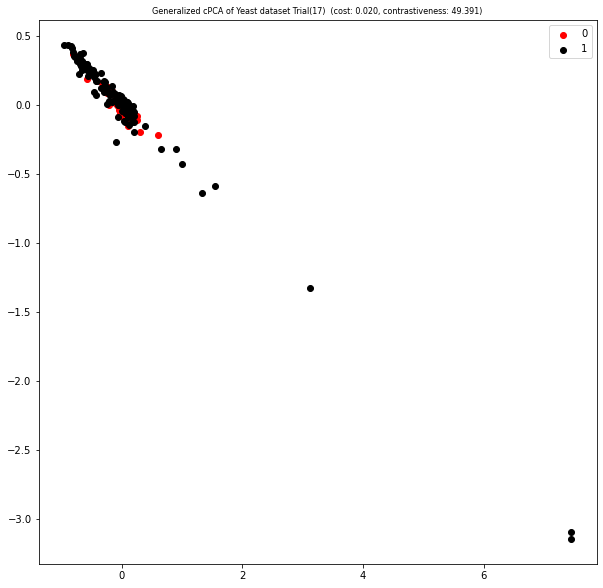

(2, 5)
[1, 3, 4, 6, 7, 8]
[[-1.13614043e-01 -2.95694498e-01]
 [-7.71971786e-02 -3.13804537e-01]
 [ 2.08058429e-02  1.38409495e-01]
 [-1.23744801e-01 -5.34460752e-02]
 [-9.69581461e-02 -2.98504623e-01]
 [ 1.38540758e-01  5.02525687e-01]
 [-1.09296545e-01 -4.03732454e-01]
 [-1.45996186e-01 -4.94572690e-01]
 [-5.71111076e-02 -2.87773046e-01]
 [ 4.76010941e-02 -5.60443996e-03]
 [ 1.09987355e-01  4.15808583e-01]
 [ 1.04317522e-02 -4.34912257e-02]
 [ 3.46472763e-02  1.34580699e-01]
 [-1.00687227e-02 -8.68528816e-02]
 [ 3.13565946e-03 -4.55373627e-02]
 [-7.69241595e-02 -1.80865432e-01]
 [-1.21334966e-02 -1.54660126e-01]
 [-2.48929056e-01 -6.42596151e-01]
 [-1.64381310e-02 -8.22236343e-02]
 [ 1.99110711e-01  4.43862268e-01]
 [ 6.47995555e-02  3.50045600e-01]
 [-3.86996807e-01 -1.22867691e+00]
 [ 1.59846309e-02  1.51840800e-01]
 [ 6.26560836e-02  4.10621946e-02]
 [-7.46700197e-02 -1.95120281e-01]
 [-2.83698555e-02 -1.82009708e-01]
 [-2.21943149e-02  4.13864824e-02]
 [-3.65879081e-02  5.62927510

<Figure size 432x288 with 0 Axes>

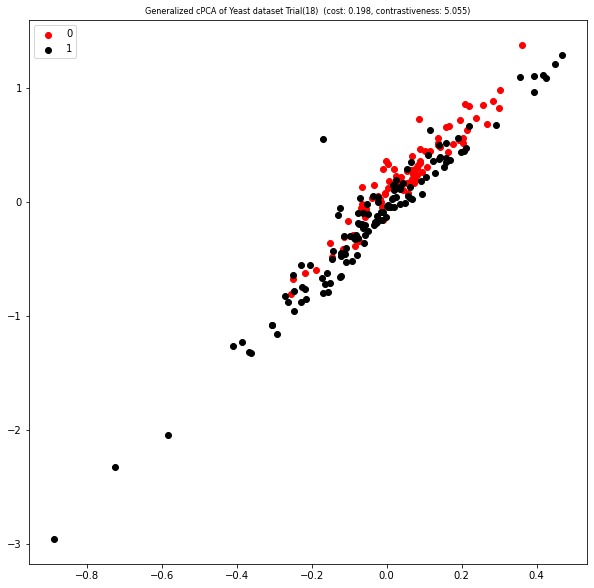

(2, 6)
[1, 3, 4, 5, 7, 8]
[[ 5.33307512e-01  2.15276438e-01]
 [ 5.97644928e-02  3.32655113e-02]
 [ 2.62396227e-01  9.95805852e-02]
 [-6.58910834e-02 -1.39009956e-01]
 [-3.24712095e-02 -2.79411131e-02]
 [ 4.27397695e-02 -2.98979788e-03]
 [-1.17493540e-01 -4.23570446e-02]
 [-1.12425044e-01 -4.97554169e-02]
 [-1.21050649e-01 -3.92500587e-02]
 [-1.26497807e-02  3.65602817e-02]
 [-1.42162519e-02 -2.98502879e-02]
 [-1.14892811e-01 -2.39771595e-02]
 [-8.86474260e-02 -5.58411319e-02]
 [ 5.37219491e-02  2.80114060e-02]
 [-3.97403264e-02 -4.56487580e-03]
 [-6.40458917e-02 -5.61546992e-02]
 [-1.57248685e-01 -3.04437029e-02]
 [ 2.40388627e-01  5.13929825e-02]
 [ 4.90932692e-01  2.48936483e-01]
 [ 8.03542974e-02  9.80371740e-02]
 [ 9.23159412e-02 -8.41340184e-03]
 [ 2.18797225e-01  1.19541679e-01]
 [-1.18976790e-01 -6.92655563e-02]
 [-1.31384551e-01 -4.74407911e-03]
 [-4.94371679e-02 -2.51945970e-02]
 [-2.15259437e-01 -6.78333053e-02]
 [-8.90390484e-02 -7.92094731e-02]
 [-3.16522797e-02 -6.52271813

<Figure size 432x288 with 0 Axes>

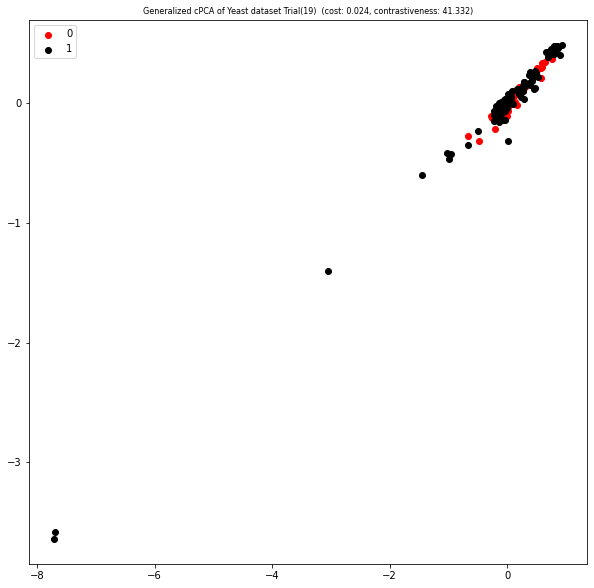

(2, 7)
[1, 3, 4, 5, 6, 8]
[[-9.70565770e-01 -3.08587739e-01]
 [-1.93728318e-01 -3.77596250e-02]
 [-2.78190522e-01 -1.06432796e-01]
 [-1.61411096e-01 -1.46047913e-01]
 [-3.08901717e-01 -9.57096981e-02]
 [-1.96961538e-01 -9.13885931e-02]
 [-2.73887846e-01 -6.36793277e-02]
 [-3.72633972e-01 -1.03185052e-01]
 [ 8.91003243e-03  4.32744986e-02]
 [-3.43997485e-01 -5.96728886e-02]
 [-1.71534321e-01 -8.51943897e-02]
 [-3.25877998e-01 -6.71568011e-02]
 [-1.66769642e-01 -7.32390752e-02]
 [-4.74045675e-01 -1.39290717e-01]
 [-4.44381552e-01 -1.13881983e-01]
 [-3.78214234e-01 -1.31979203e-01]
 [-3.91250336e-01 -7.50764370e-02]
 [-4.90119140e-01 -1.87227559e-01]
 [-6.23700818e-01 -1.74952082e-01]
 [-2.23509088e-01 -5.75264215e-03]
 [-3.12217995e-01 -1.46385848e-01]
 [-5.80597765e-01 -1.75202893e-01]
 [-2.17106632e-01 -8.46515849e-02]
 [-2.65529328e-01 -2.30888748e-02]
 [-2.08466217e-01 -7.03998638e-02]
 [-2.04184855e-01 -2.60611865e-02]
 [-1.06815130e-01 -5.88289427e-02]
 [-2.59825949e-01 -1.26316552

<Figure size 432x288 with 0 Axes>

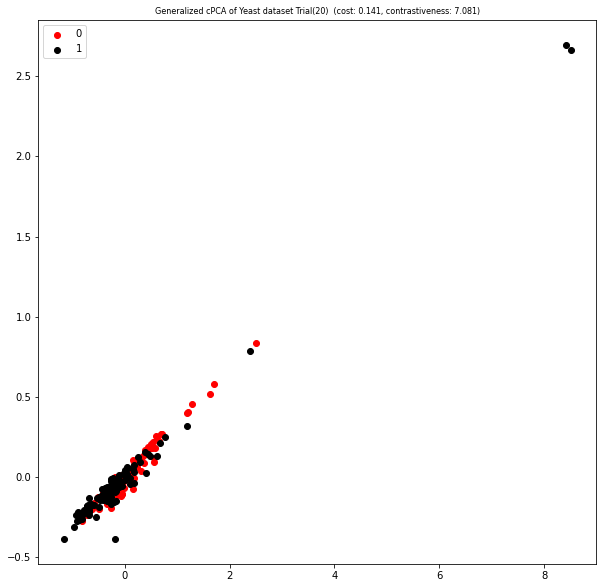

(2, 8)
[1, 3, 4, 5, 6, 7]
[[ 5.97237314e-01 -5.48361570e-02]
 [ 5.30903786e-02 -8.98720101e-03]
 [ 2.97689239e-01 -1.83028255e-02]
 [-7.30010155e-02  1.01313747e-01]
 [-4.13368879e-02  1.72429892e-02]
 [ 1.11742378e-01 -1.60641326e-03]
 [-1.41578321e-01  7.82789705e-03]
 [-1.47501410e-01  1.84739524e-02]
 [-1.15215676e-01 -3.79180097e-03]
 [ 3.12167791e-02 -4.67517347e-02]
 [ 3.45977844e-02  1.07914485e-02]
 [-7.58461126e-02 -2.45090250e-02]
 [-7.98039769e-02  2.17510875e-02]
 [ 7.41935378e-02 -1.33068408e-02]
 [ 4.95381006e-03 -1.87884078e-02]
 [-5.71631872e-02  2.84224274e-02]
 [-1.28093646e-01 -2.93103036e-02]
 [ 2.05202971e-01  2.60904502e-02]
 [ 5.31074732e-01 -9.02590117e-02]
 [ 1.93493246e-01 -9.01843552e-02]
 [ 1.51780973e-01  1.85932330e-02]
 [ 6.10906778e-02 -1.33457965e-02]
 [-8.03882806e-02  1.17780898e-02]
 [-7.70713636e-02 -4.93522223e-02]
 [-6.74025258e-02  8.56349849e-03]
 [-2.05310012e-01 -8.08878907e-03]
 [-6.37572683e-02  3.55872915e-02]
 [-1.25208969e-02  4.15691494

<Figure size 432x288 with 0 Axes>

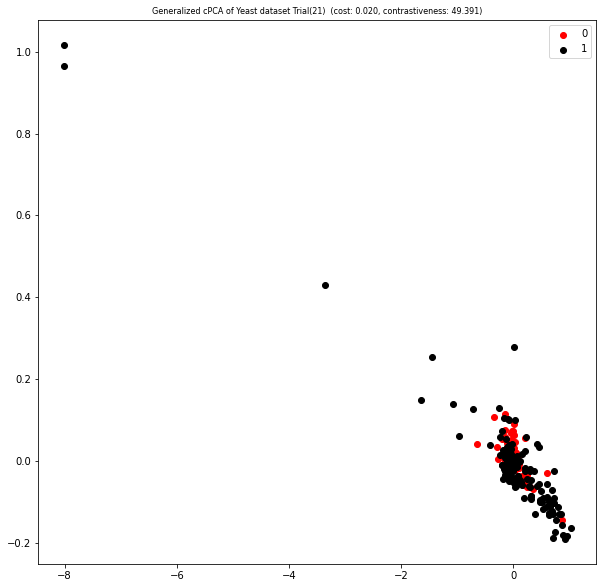

(3, 4)
[1, 2, 5, 6, 7, 8]
[[ 0.61494204 -0.13083823]
 [ 0.55953499 -0.34349936]
 [ 0.36253452 -0.19719396]
 [ 0.44311617 -0.23529846]
 [ 0.50800588 -0.38519452]
 [ 0.14714715 -0.14044606]
 [ 0.48281387 -0.38829534]
 [ 0.48289094 -0.42819276]
 [ 0.53717577 -0.3199827 ]
 [ 0.31276423 -0.31923963]
 [ 0.11145522 -0.19524707]
 [ 0.37523997 -0.32229182]
 [ 0.15969202 -0.26232711]
 [ 0.25348476 -0.35121699]
 [ 0.39224624 -0.40896677]
 [ 0.40481092 -0.40975295]
 [ 0.36624867 -0.35781892]
 [ 0.36528718 -0.16146515]
 [ 0.12262242 -0.03120608]
 [ 0.24710098 -0.21762641]
 [ 0.12425079 -0.18384104]
 [ 0.13336869 -0.0488363 ]
 [ 0.23734785 -0.18795468]
 [ 0.33480083 -0.32502332]
 [ 0.25585581 -0.22147927]
 [ 0.37248338 -0.35679592]
 [ 0.35267843 -0.28591732]
 [ 0.28547058 -0.28536876]
 [ 0.33202383 -0.36233064]
 [ 0.35095052 -0.33020425]
 [ 0.2032565  -0.31843188]
 [ 0.31272788 -0.37512907]
 [ 0.22699646 -0.15442004]
 [ 0.30217902 -0.43272263]
 [ 0.26183262 -0.29414529]
 [ 0.01473437  0.01352636]
 [

<Figure size 432x288 with 0 Axes>

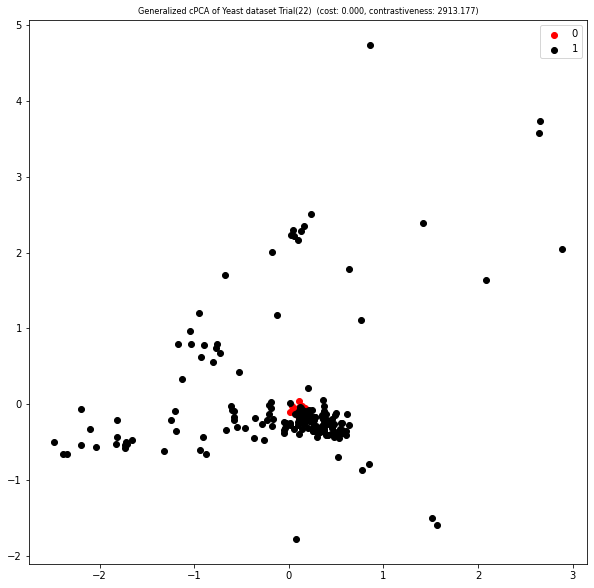

(3, 5)
[1, 2, 4, 6, 7, 8]
[[-9.59262531e-01  2.90094017e-01]
 [-9.93419568e-01  2.73915314e-01]
 [-1.02578416e+00  2.72873966e-01]
 [-7.38139830e-01  2.70286415e-01]
 [-7.48201856e-01  2.01327654e-01]
 [-6.75976820e-01  5.71539311e-02]
 [-7.28421108e-01  1.71014784e-01]
 [-6.51008661e-01  1.58099197e-01]
 [-8.27182634e-01  2.32671649e-01]
 [-5.74194995e-01  5.38573040e-02]
 [-5.96014158e-01  4.38489662e-02]
 [-5.23606108e-01  7.67965457e-02]
 [-6.08391792e-01  5.08331171e-02]
 [-4.95772213e-01  4.89905854e-02]
 [-4.23706024e-01  7.05534120e-02]
 [-4.84455814e-01  1.31024557e-01]
 [-4.37989608e-01  4.01969376e-02]
 [-7.71480572e-01  3.04630924e-01]
 [-8.97287258e-01  2.15073130e-01]
 [-6.12569246e-01  5.48391447e-02]
 [-4.86668560e-01  7.51148134e-02]
 [-1.12023657e+00  2.97134451e-01]
 [-5.29963800e-01  1.01346505e-01]
 [-4.94871425e-01  4.56238294e-02]
 [-7.42209826e-01  1.72723361e-01]
 [-5.22102417e-01  8.33296925e-02]
 [-5.90032910e-01  1.76923298e-01]
 [-5.37785612e-01  1.55296605

<Figure size 432x288 with 0 Axes>

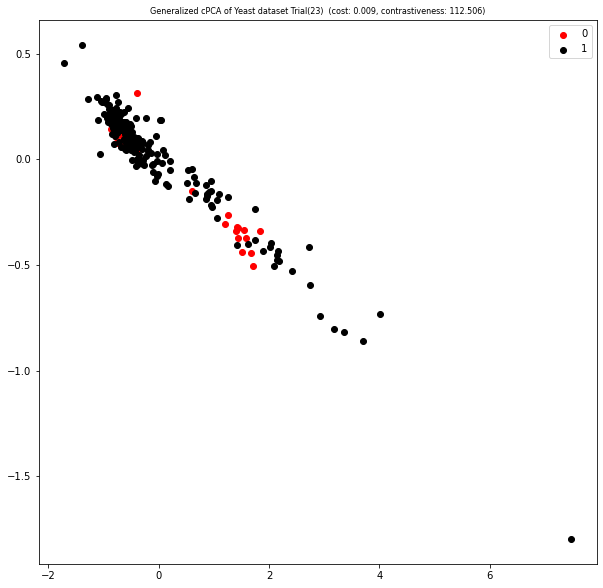

(3, 6)
[1, 2, 4, 5, 7, 8]
[[-1.78594081e-01 -2.85023572e-01]
 [-3.28870519e-01 -1.67796935e-01]
 [-1.34542967e-01 -3.20830552e-01]
 [-1.93809820e-01 -2.47169417e-01]
 [-3.70661808e-01 -1.69920834e-01]
 [-2.04194572e-02 -5.11243562e-01]
 [-3.59239730e-01 -1.79903346e-01]
 [-4.01383199e-01 -1.65717742e-01]
 [-3.36538355e-01 -1.25585262e-01]
 [-2.86466445e-01 -2.89508799e-01]
 [-6.74758001e-02 -4.81802567e-01]
 [-3.17277056e-01 -2.23279718e-01]
 [-1.27068866e-01 -4.42139668e-01]
 [-2.89139415e-01 -3.27781667e-01]
 [-4.28735298e-01 -1.68698104e-01]
 [-4.04771527e-01 -1.68141584e-01]
 [-3.54444069e-01 -2.11658108e-01]
 [-1.32861555e-01 -2.63410661e-01]
 [ 5.35557369e-02 -4.52923773e-01]
 [-2.11062008e-01 -3.10599698e-01]
 [-1.01416842e-01 -4.28509027e-01]
 [ 1.73257898e-01 -5.11905570e-01]
 [-1.35895286e-01 -3.26482298e-01]
 [-3.24472945e-01 -2.20483365e-01]
 [-1.29837746e-01 -3.24690463e-01]
 [-3.38337369e-01 -1.98279592e-01]
 [-2.70214541e-01 -2.09820009e-01]
 [-2.43746597e-01 -2.58895590

<Figure size 432x288 with 0 Axes>

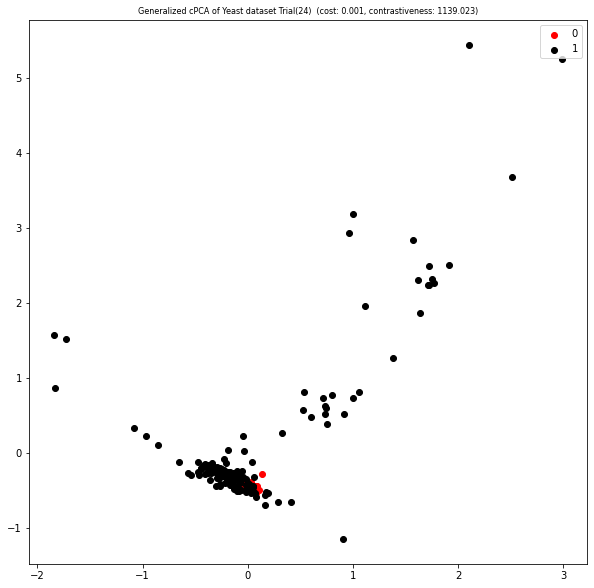

(3, 7)
[1, 2, 4, 5, 6, 8]
[[-1.68780122e-01 -2.37746737e-01]
 [-7.28606528e-01 -8.59121763e-01]
 [-6.67476508e-01 -7.54561057e-01]
 [-3.59548917e-01 -2.92452187e-01]
 [-4.70937880e-01 -5.69479146e-01]
 [-1.07817044e-01 -1.58939448e-01]
 [-4.31383177e-01 -5.41521452e-01]
 [-3.79226857e-01 -4.81816088e-01]
 [-4.95433812e-01 -5.94917835e-01]
 [-1.33861286e-01 -2.80677170e-01]
 [-1.23077945e-01 -1.70243327e-01]
 [-7.64711257e-02 -1.90590990e-01]
 [-2.06033628e-01 -2.63402512e-01]
 [-1.07624703e-01 -2.13306589e-01]
 [-8.50150224e-02 -2.14705197e-01]
 [-2.11584125e-01 -2.82105771e-01]
 [ 1.13552654e-02 -1.13812436e-01]
 [-2.25188126e-01 -1.61588659e-01]
 [-2.31777983e-01 -2.84802255e-01]
 [-1.01060110e-01 -2.68443299e-01]
 [ 2.27169889e-02  2.13951696e-02]
 [-4.91302127e-01 -4.45232544e-01]
 [ 2.04801305e-03 -1.08407053e-02]
 [-5.67664007e-02 -2.02802015e-01]
 [-3.28114157e-01 -3.60988174e-01]
 [-1.49777744e-01 -2.55532952e-01]
 [-2.51760149e-01 -2.73194982e-01]
 [-1.95369333e-01 -2.03368479

<Figure size 432x288 with 0 Axes>

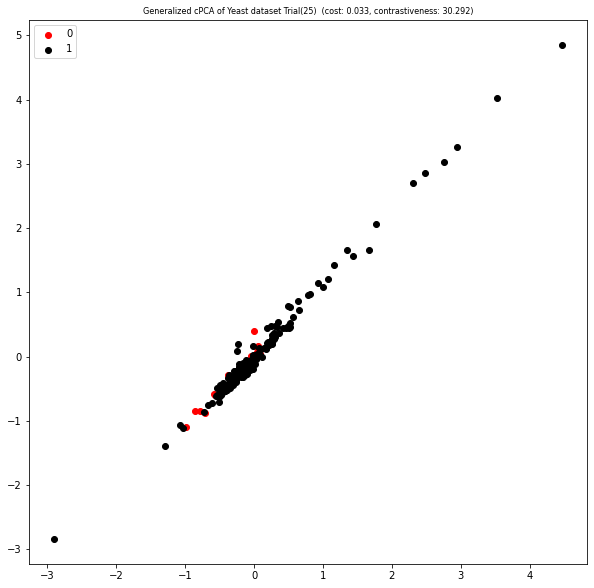

(3, 8)
[1, 2, 4, 5, 6, 7]
[[-0.58043328  0.24119815]
 [-0.48697829  0.44019927]
 [-0.3201457   0.26022825]
 [-0.39237139  0.31244298]
 [-0.42870538  0.47171073]
 [-0.11882893  0.16485359]
 [-0.40337188  0.47013146]
 [-0.39614328  0.50936487]
 [-0.46931437  0.41298191]
 [-0.24889033  0.37102823]
 [-0.07370759  0.21219872]
 [-0.30975108  0.38548266]
 [-0.10882414  0.28699878]
 [-0.18475966  0.39159426]
 [-0.31060088  0.47382647]
 [-0.32279091  0.47692184]
 [-0.29440984  0.41875068]
 [-0.32939437  0.22561417]
 [-0.11474624  0.05302778]
 [-0.20297554  0.2591027 ]
 [-0.08838944  0.20334606]
 [-0.12201492  0.07233147]
 [-0.19881103  0.22812596]
 [-0.26950592  0.38075813]
 [-0.21083706  0.26451525]
 [-0.30071063  0.41891536]
 [-0.29422116  0.34563773]
 [-0.22826463  0.33275834]
 [-0.25995017  0.41694969]
 [-0.28441248  0.38884741]
 [-0.14140803  0.35013353]
 [-0.23862016  0.42598647]
 [-0.19479714  0.1932792 ]
 [-0.21772292  0.48066277]
 [-0.20344211  0.33702865]
 [-0.01686642 -0.01077473]
 [

<Figure size 432x288 with 0 Axes>

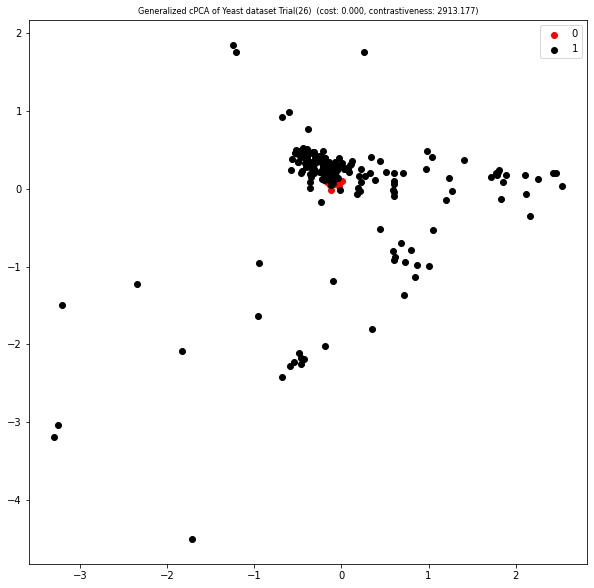

(4, 5)
[1, 2, 3, 6, 7, 8]
[[ 6.78133279e-01  7.07551860e-03]
 [ 5.27892224e-01 -3.23427135e-02]
 [ 7.60599488e-02 -7.56758002e-03]
 [ 3.73991228e-01  9.63003109e-02]
 [ 5.58144789e-01  8.80735505e-03]
 [-2.57678699e-01 -3.57976580e-02]
 [ 7.04939380e-01 -2.53356172e-03]
 [ 8.17384450e-01  1.54516150e-02]
 [ 4.54136472e-01 -4.79975469e-02]
 [ 2.12954851e-01 -6.18478641e-02]
 [-1.77038521e-01 -2.29832718e-02]
 [ 2.89701990e-01 -1.86909150e-02]
 [ 1.50020696e-01 -2.03779512e-02]
 [ 3.30403436e-01 -2.66081995e-02]
 [ 2.24037220e-01 -9.48257634e-03]
 [ 4.08407411e-01  3.14706602e-02]
 [ 4.27895755e-01 -1.90251334e-02]
 [ 1.02140316e+00  4.86396314e-02]
 [ 4.12377957e-01 -2.74283876e-02]
 [-3.71245766e-01 -9.93959201e-02]
 [-1.36446750e-01  5.45903762e-03]
 [ 1.99203808e+00  4.71110770e-02]
 [ 1.49916113e-01  2.71116002e-02]
 [ 1.51261008e-01 -4.86422988e-02]
 [ 5.45454444e-01  1.77626329e-02]
 [ 4.36213283e-01 -1.69579777e-02]
 [ 1.41888788e-01  2.19631728e-02]
 [ 1.82251716e-01  5.01589955

<Figure size 432x288 with 0 Axes>

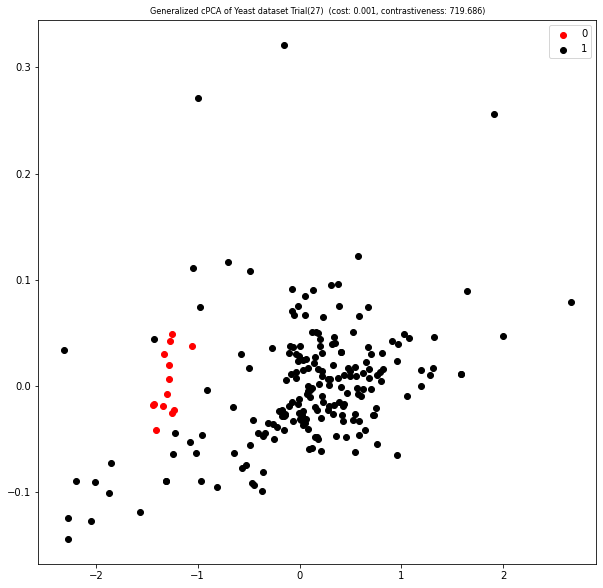

(4, 6)
[1, 2, 3, 5, 7, 8]
[[ 3.58547204e-01 -7.34186770e-01]
 [ 4.87071809e-01 -1.02852790e-01]
 [ 4.59533830e-01 -2.38208297e-01]
 [ 5.14698629e-01  3.18810586e-02]
 [ 5.08504090e-01  2.29755162e-03]
 [-1.94757511e-01  1.62628606e-01]
 [ 5.17668974e-01  4.74788592e-02]
 [ 5.14612185e-01  3.24363780e-02]
 [ 5.11562801e-01  1.73487079e-02]
 [ 2.05395721e-01  4.32282250e-02]
 [-1.29361407e-01  2.05795597e-01]
 [ 5.23777480e-01  7.75949023e-02]
 [-1.23245448e-01  2.35899347e-01]
 [ 2.75868762e-02  3.82850046e-03]
 [ 5.17662645e-01  4.75256168e-02]
 [ 5.17692320e-01  4.73475962e-02]
 [ 5.26827295e-01  9.26942062e-02]
 [ 3.86123413e-01 -5.99110368e-01]
 [ 3.58500233e-01 -7.33970809e-01]
 [ 3.08636099e-01 -5.68906289e-03]
 [-2.85863210e-02  5.46950800e-03]
 [ 3.49321090e-01 -7.79091379e-01]
 [ 5.20747795e-01  6.23398446e-02]
 [ 5.29880466e-01  1.07760413e-01]
 [ 4.93191285e-01 -7.28441400e-02]
 [ 5.39081662e-01  1.52736635e-01]
 [ 5.20771024e-01  6.22452835e-02]
 [ 5.11588459e-01  1.71499419

<Figure size 432x288 with 0 Axes>

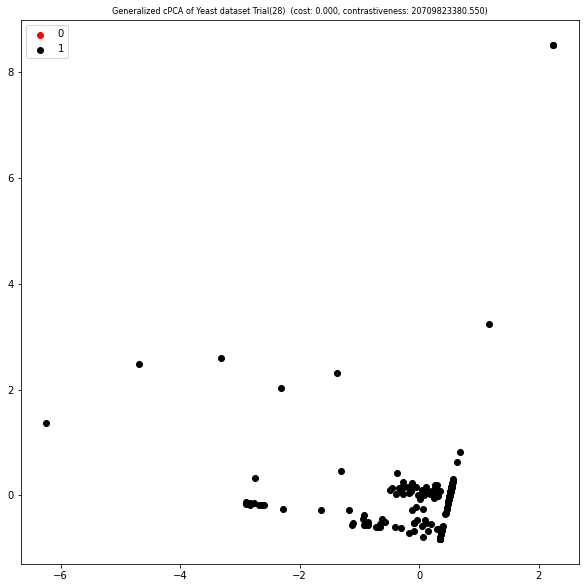

(4, 7)
[1, 2, 3, 5, 6, 8]
[[-8.08944890e-03 -5.46567962e-01]
 [-4.55764323e-02 -7.03481750e-01]
 [ 6.59398698e-03 -7.15317926e-01]
 [ 8.98459747e-02 -5.89885504e-01]
 [-1.37576323e-02 -6.47987264e-01]
 [ 2.38559391e-02  2.00182765e+00]
 [-3.25363790e-02 -6.27693044e-01]
 [-2.40751677e-02 -6.15090813e-01]
 [-5.70823116e-02 -6.32085930e-01]
 [-5.37868005e-02  5.00785274e-01]
 [ 2.60943084e-02  1.79677788e+00]
 [-2.94649872e-02 -5.71644794e-01]
 [ 1.00433992e-02  1.79476754e+00]
 [-2.09354158e-02  1.10787782e+00]
 [-2.36729822e-02 -5.97764815e-01]
 [ 9.53085361e-03 -6.03444409e-01]
 [-4.01464321e-02 -5.48377355e-01]
 [ 1.52518201e-02 -5.05356406e-01]
 [-2.53446527e-02 -5.75445621e-01]
 [-6.14612635e-02  7.66414915e-02]
 [ 4.47456679e-02  1.34070345e+00]
 [-2.48848112e-02 -5.00436010e-01]
 [ 2.94613401e-02 -5.34136950e-01]
 [-5.27608966e-02 -5.80914185e-01]
 [ 3.25480145e-03 -5.89957848e-01]
 [-3.56427645e-02 -5.75641804e-01]
 [ 2.28589050e-02 -5.99611493e-01]
 [ 4.62293710e-02 -5.93128145

<Figure size 432x288 with 0 Axes>

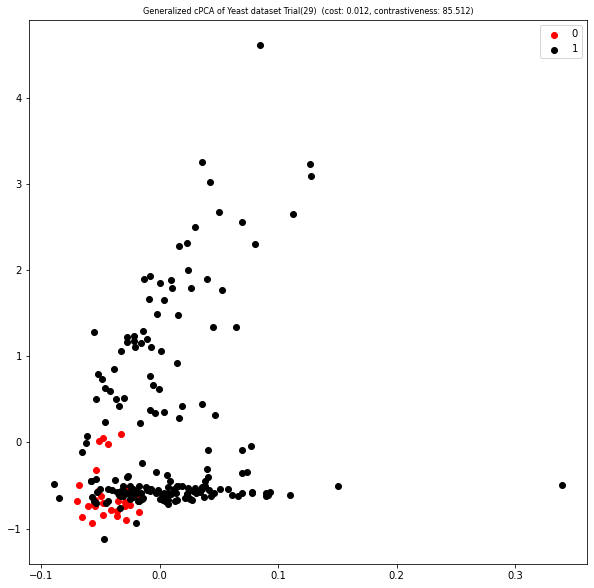

(4, 8)
[1, 2, 3, 5, 6, 7]
[[ 1.19764062e+00 -7.87815457e-01]
 [ 1.06122397e+00  3.98407794e-01]
 [ 8.06874966e-01  8.28715377e-01]
 [ 6.66176669e-01  2.99837076e-01]
 [ 5.94432635e-01  6.19969504e-01]
 [-7.76068899e-01  1.08759039e+00]
 [ 6.32843138e-01  5.15448958e-01]
 [ 5.24184500e-01  5.53329001e-01]
 [ 1.13371307e+00 -2.19366359e-01]
 [-1.10433735e-01  6.66846362e-01]
 [-7.98065135e-01  1.20733478e+00]
 [ 2.04769195e-01  5.69514982e-01]
 [-6.59379040e-01  1.10644422e+00]
 [-4.33253378e-01  7.94466360e-01]
 [-2.08836099e-02  8.49937590e-01]
 [ 1.81203605e-01  7.33147851e-01]
 [ 1.15227389e-01  5.33503383e-01]
 [ 1.64339328e+00 -1.52650220e+00]
 [ 1.22244701e+00 -5.47916226e-01]
 [-3.04743499e-02  7.32639631e-01]
 [-5.16000973e-01  6.31499947e-01]
 [ 2.23055921e+00 -1.58831240e+00]
 [ 2.62452740e-01  3.99430176e-01]
 [ 1.45769021e-01  6.38887968e-01]
 [ 7.49479531e-01  2.60314126e-01]
 [ 3.23374121e-01  4.88544013e-01]
 [ 4.86963343e-01  3.65185703e-01]
 [ 2.59984754e-01  6.55830265

<Figure size 432x288 with 0 Axes>

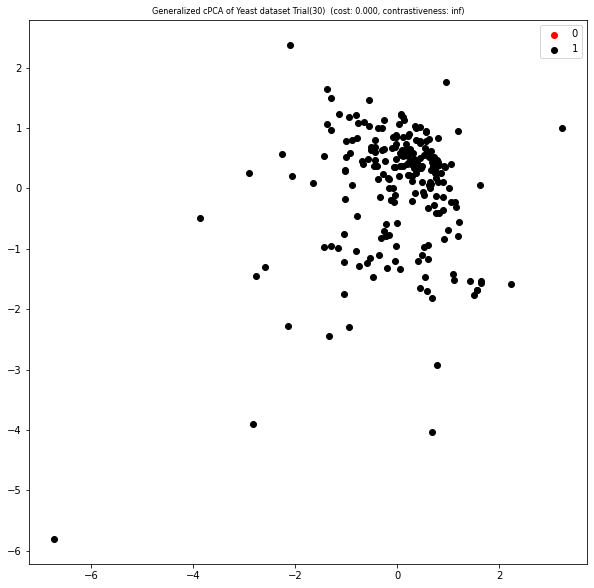

(5, 6)
[1, 2, 3, 4, 7, 8]
[[ 2.06761132e-01 -6.01369728e-02]
 [ 2.36285992e-01 -1.30044756e-01]
 [ 4.92772356e-01 -2.36249329e-01]
 [ 3.42362252e-01 -6.24275574e-02]
 [ 1.57448140e-01 -6.78638075e-02]
 [ 5.29242417e-01 -3.30658637e-01]
 [ 1.34415481e-01 -8.12014285e-02]
 [ 6.31588612e-02 -3.34892752e-02]
 [ 1.57946655e-01 -9.40664571e-02]
 [ 1.84800351e-01 -1.68966319e-01]
 [ 4.69157549e-01 -2.93608994e-01]
 [ 1.68224420e-01 -1.11208344e-01]
 [ 3.72364177e-01 -2.53186387e-01]
 [ 1.38904192e-01 -1.23608093e-01]
 [ 6.59797844e-02 -4.27770833e-02]
 [ 8.24910143e-02 -1.13124931e-02]
 [ 8.84725735e-02 -8.20674899e-02]
 [ 1.00135556e-01  2.68657173e-02]
 [ 4.06056196e-01 -2.21783791e-01]
 [ 3.40498858e-01 -2.55172285e-01]
 [ 3.57910641e-01 -1.84719587e-01]
 [ 2.98414510e-01 -1.64610947e-01]
 [ 3.43844454e-01 -1.56270602e-01]
 [ 1.70103223e-01 -1.39802161e-01]
 [ 3.27289375e-01 -1.64230607e-01]
 [ 1.30541055e-01 -9.53696408e-02]
 [ 2.43878858e-01 -8.19212710e-02]
 [ 2.64164501e-01 -8.05257704

<Figure size 432x288 with 0 Axes>

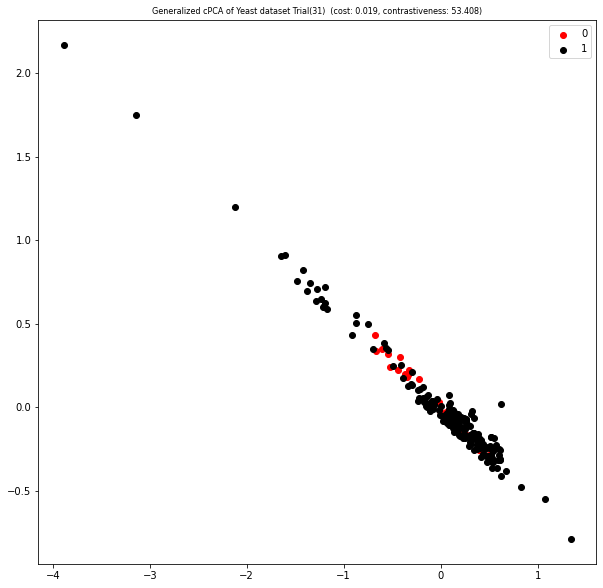

(5, 7)
[1, 2, 3, 4, 6, 8]
[[ 3.19057235e-01  4.38782766e-01]
 [ 7.51236039e-01  9.74860459e-01]
 [ 6.39456329e-01  9.12781214e-01]
 [ 2.79558602e-01  5.52490235e-01]
 [ 5.49716805e-01  7.51705342e-01]
 [ 4.12279795e-02  5.07863163e-02]
 [ 5.58636278e-01  7.28810255e-01]
 [ 5.34404557e-01  7.09813085e-01]
 [ 5.11521998e-01  6.21129525e-01]
 [ 2.66199417e-01  2.65500752e-01]
 [ 7.43852806e-02  1.05153895e-01]
 [ 2.48619460e-01  3.09460506e-01]
 [ 1.89734137e-01  2.33912588e-01]
 [ 2.11835285e-01  2.31220992e-01]
 [ 2.57855488e-01  3.36952473e-01]
 [ 3.19208757e-01  4.75312495e-01]
 [ 2.19643682e-01  2.50037539e-01]
 [ 2.78455510e-01  4.10425527e-01]
 [ 3.69986851e-01  4.74240267e-01]
 [ 1.88953267e-01  1.60858250e-01]
 [-6.05132892e-02 -3.74327249e-02]
 [ 7.26803128e-01  9.42045652e-01]
 [ 8.93285448e-02  1.86547950e-01]
 [ 2.43940145e-01  2.64522769e-01]
 [ 4.15813942e-01  5.87939638e-01]
 [ 3.10558124e-01  3.81910215e-01]
 [ 2.48264386e-01  3.98015422e-01]
 [ 2.26406393e-01  4.08190866

<Figure size 432x288 with 0 Axes>

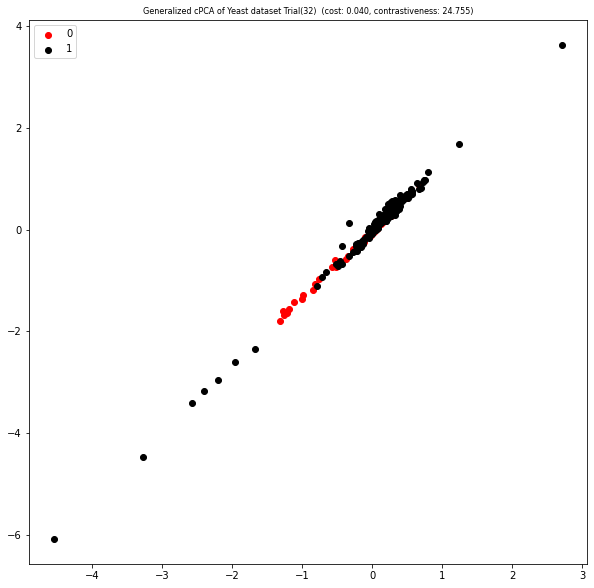

(5, 8)
[1, 2, 3, 4, 6, 7]
[[-1.89118518e-02  6.77927977e-01]
 [-5.25435359e-02  5.26288617e-01]
 [-1.04738091e-02  7.57382885e-02]
 [ 8.19015448e-02  3.77424198e-01]
 [-1.25829567e-02  5.58090100e-01]
 [-2.58962835e-02 -2.58847858e-01]
 [-2.95400925e-02  7.04342224e-01]
 [-1.58765964e-02  8.17392193e-01]
 [-6.53618111e-02  4.51982680e-01]
 [-6.99605297e-02  2.10440644e-01]
 [-1.61810680e-02 -1.77777266e-01]
 [-2.97758860e-02  2.88784945e-01]
 [-2.61091325e-02  1.49142429e-01]
 [-3.92468649e-02  3.29151339e-01]
 [-1.80584002e-02  2.23518556e-01]
 [ 1.58006057e-02  4.09324618e-01]
 [-3.54049689e-02  4.26862563e-01]
 [ 9.46835109e-03  1.02253547e+00]
 [-4.32074570e-02  4.11045627e-01]
 [-8.50970512e-02 -3.74769511e-01]
 [ 1.06842978e-02 -1.36128078e-01]
 [-2.92480486e-02  1.99241089e+00]
 [ 2.13490268e-02  1.50857337e-01]
 [-5.44008818e-02  1.49297034e-01]
 [-3.14801498e-03  5.45752962e-01]
 [-3.36579263e-02  4.35255402e-01]
 [ 1.65117387e-02  1.42639613e-01]
 [ 4.31406360e-02  1.84052508

<Figure size 432x288 with 0 Axes>

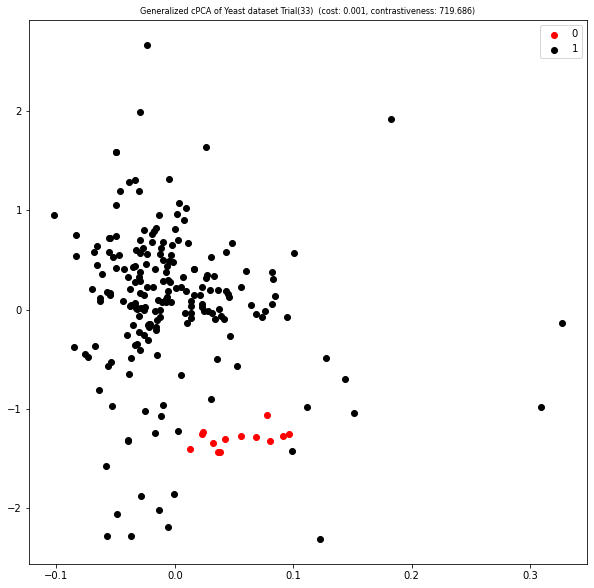

(6, 7)
[1, 2, 3, 4, 5, 8]
[[ 5.40084799e-01 -6.98075508e-02]
 [ 5.93359658e-01 -1.10142474e-01]
 [ 6.26200437e-01 -6.22643083e-02]
 [ 5.72211867e-01  2.34689725e-02]
 [ 5.84156643e-01 -8.07795595e-02]
 [-2.03724252e+00  2.84545418e-01]
 [ 5.67456361e-01 -9.88394701e-02]
 [ 5.64342076e-01 -9.09401718e-02]
 [ 5.57483925e-01 -1.19579234e-01]
 [-5.38578812e-01  1.73833278e-02]
 [-1.83240980e+00  2.60257802e-01]
 [ 5.65536971e-01 -9.85437203e-02]
 [-1.84588930e+00  2.45756733e-01]
 [-1.14324036e+00  1.25669877e-01]
 [ 5.86932023e-01 -9.48492610e-02]
 [ 5.82799993e-01 -6.03745434e-02]
 [ 5.53577810e-01 -1.09332772e-01]
 [ 4.99946352e-01 -4.43019366e-02]
 [ 5.55638535e-01 -9.14303893e-02]
 [-1.07773781e-01 -4.31520494e-02]
 [-1.34143168e+00  2.16032549e-01]
 [ 4.57558710e-01 -8.20470561e-02]
 [ 5.57914217e-01 -3.99402847e-02]
 [ 5.70948043e-01 -1.22609048e-01]
 [ 5.58561163e-01 -6.38212542e-02]
 [ 5.57491953e-01 -1.03750573e-01]
 [ 5.78701693e-01 -4.53568309e-02]
 [ 5.85996110e-01 -2.41922385

<Figure size 432x288 with 0 Axes>

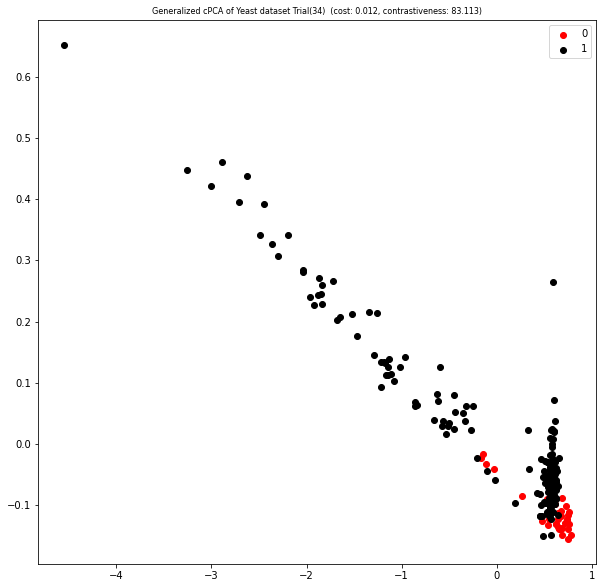

(6, 8)
[1, 2, 3, 4, 5, 7]
[[-5.83989320e-01 -7.56128521e-01]
 [-5.79230400e-01 -2.26376365e-01]
 [-5.80253345e-01 -3.39900563e-01]
 [-5.78232124e-01 -1.12909949e-01]
 [-5.78440131e-01 -1.38091718e-01]
 [ 2.09653155e+00 -9.41983435e-03]
 [-5.78096896e-01 -1.00243798e-01]
 [-5.78210621e-01 -1.12858494e-01]
 [-5.78325669e-01 -1.25475457e-01]
 [ 5.53084388e-01 -1.06428700e-01]
 [ 1.89118274e+00  2.72535875e-02]
 [-5.77868353e-01 -7.50120589e-02]
 [ 1.89141101e+00  5.24833377e-02]
 [ 1.16980708e+00 -1.40780328e-01]
 [-5.78095152e-01 -1.00240060e-01]
 [-5.78102005e-01 -1.00256982e-01]
 [-5.77752425e-01 -6.23927577e-02]
 [-5.82977430e-01 -6.42629243e-01]
 [-5.83981489e-01 -7.56106153e-01]
 [ 1.41368306e-01 -1.46595284e-01]
 [ 1.37548458e+00 -1.39640648e-01]
 [-5.84322384e-01 -7.93947195e-01]
 [-5.77990481e-01 -8.76452577e-02]
 [-5.77637800e-01 -4.97758918e-02]
 [-5.79006306e-01 -2.01154034e-01]
 [-5.77302399e-01 -1.19478886e-02]
 [-5.77993816e-01 -8.76551431e-02]
 [-5.78333979e-01 -1.25494907

<Figure size 432x288 with 0 Axes>

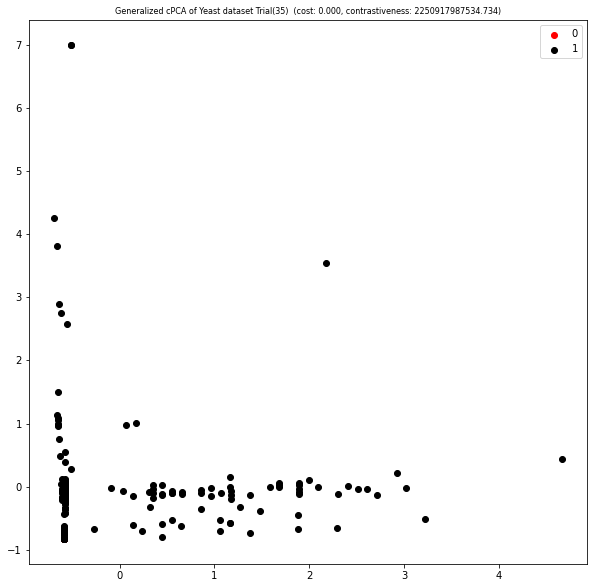

(7, 8)
[1, 2, 3, 4, 5, 6]
[[-3.90296189e-01 -3.82716502e-01]
 [-4.78091041e-01 -5.18057629e-01]
 [-5.22636177e-01 -4.88432074e-01]
 [-4.89192641e-01 -3.41647665e-01]
 [-4.59839338e-01 -4.56748814e-01]
 [ 1.43345754e+00  1.39752724e+00]
 [-4.32191917e-01 -4.56356056e-01]
 [-4.28899064e-01 -4.41538803e-01]
 [-4.18449452e-01 -4.77163850e-01]
 [ 3.99801385e-01  3.06330225e-01]
 [ 1.28339908e+00  1.25776804e+00]
 [-3.93719875e-01 -4.15487799e-01]
 [ 1.29301196e+00  1.24475732e+00]
 [ 8.16861218e-01  7.48710850e-01]
 [-4.16633337e-01 -4.29304458e-01]
 [-4.43638805e-01 -4.09170172e-01]
 [-3.69503472e-01 -4.07181295e-01]
 [-3.76537329e-01 -3.37391172e-01]
 [-3.99310358e-01 -4.15121086e-01]
 [ 9.78880534e-02  8.32560933e-03]
 [ 9.40205504e-01  9.56815233e-01]
 [-3.45288500e-01 -3.63060069e-01]
 [-4.07182960e-01 -3.46944738e-01]
 [-3.84371433e-01 -4.38752268e-01]
 [-4.29538503e-01 -4.04412251e-01]
 [-3.92353604e-01 -4.22717223e-01]
 [-4.50051498e-01 -3.96872962e-01]
 [-4.61470004e-01 -3.75475550

<Figure size 432x288 with 0 Axes>

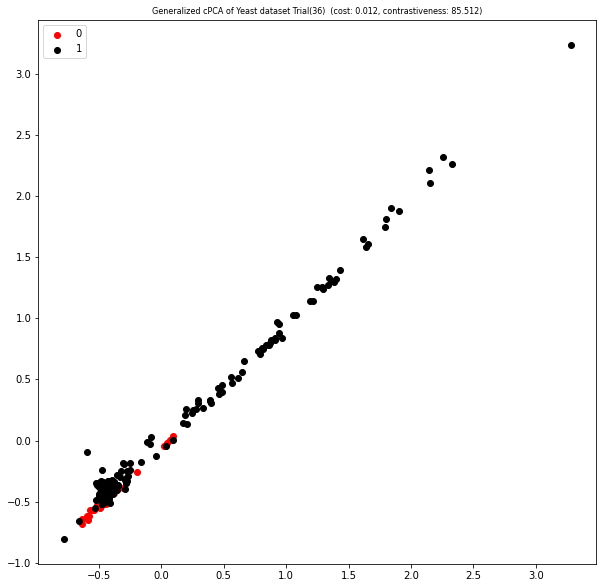

(1, 2, 3)
[4, 5, 6, 7, 8]
[[-9.31175185e-02  4.12685673e-01]
 [ 8.17654779e-05 -1.44263230e-02]
 [-5.82487318e-02  2.95142096e-01]
 [ 1.13178339e-01 -8.84904970e-02]
 [ 2.59338957e-02 -6.97980846e-02]
 [-3.39104772e-02  1.31680387e-01]
 [ 3.01506346e-02 -1.68718476e-01]
 [ 4.03300649e-02 -1.72517247e-01]
 [ 3.66105579e-02 -2.19653437e-01]
 [-5.40673723e-02  4.43961687e-03]
 [-1.52897823e-02  7.42585858e-02]
 [-2.12660688e-02 -7.95197686e-02]
 [ 1.59228470e-02 -5.44401332e-02]
 [-2.81860970e-02  5.02801172e-02]
 [-2.96587919e-02  6.74415967e-03]
 [ 2.97890139e-02 -5.91420370e-02]
 [-1.97549455e-02 -1.32411031e-01]
 [ 5.13450802e-02  1.13443817e-02]
 [-1.35517886e-01  4.36095001e-01]
 [-1.23233104e-01  1.82110921e-01]
 [-1.01364880e-02  1.43602374e-01]
 [ 2.84357277e-02 -8.22869169e-02]
 [ 1.17972402e-02 -5.87190263e-02]
 [-4.81487299e-02 -7.42346035e-02]
 [ 1.87062490e-02 -7.22521839e-02]
 [ 1.47358242e-02 -2.10906732e-01]
 [ 4.43074464e-02 -8.01675351e-02]
 [ 3.37563449e-02  6.90761031

<Figure size 432x288 with 0 Axes>

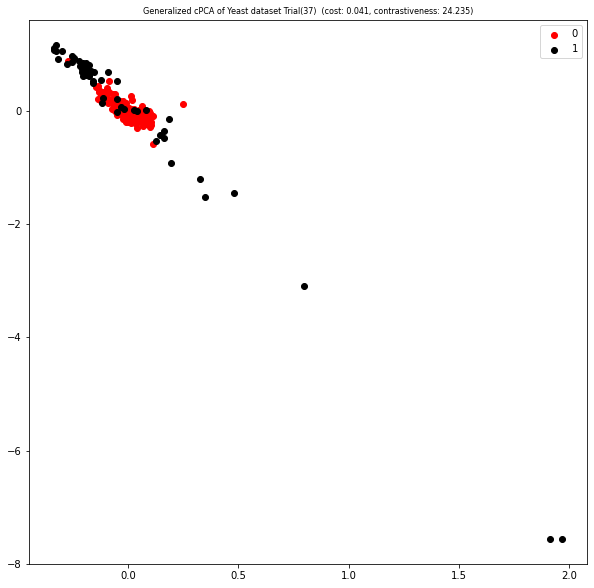

(1, 2, 4)
[3, 5, 6, 7, 8]
[[ 1.61266435e-01  3.98286514e-01]
 [-7.18024637e-03 -6.22990459e-04]
 [ 1.18009525e-01  2.77172014e-01]
 [ 4.90091424e-02 -1.42079957e-01]
 [-1.12222114e-02 -6.42097708e-02]
 [ 5.27039316e-02  1.15999564e-01]
 [-6.23598003e-02 -1.46915878e-01]
 [-5.36345483e-02 -1.52623289e-01]
 [-9.48147129e-02 -1.99508282e-01]
 [-3.48738375e-02  3.39571274e-02]
 [ 3.67446031e-02  6.10791016e-02]
 [-5.40452161e-02 -5.94277464e-02]
 [-8.30751721e-03 -5.39264550e-02]
 [ 1.55374727e-02  6.38499075e-02]
 [-1.13123758e-02  2.03908799e-02]
 [ 5.82823132e-04 -6.30027839e-02]
 [-8.01723356e-02 -1.01545195e-01]
 [ 5.07602305e-02 -7.77521534e-03]
 [ 1.34101201e-01  4.38834282e-01]
 [ 1.74524472e-03  2.04872679e-01]
 [ 7.90955013e-02  1.14245232e-01]
 [-1.50918286e-02 -5.10014620e-02]
 [-1.62335958e-02 -6.99058135e-02]
 [-7.47605859e-02 -4.22607710e-02]
 [-1.96922539e-02 -6.89648984e-02]
 [-9.86814910e-02 -1.84484953e-01]
 [-5.52508558e-03 -9.84926926e-02]
 [ 3.83139347e-02 -1.92319564

<Figure size 432x288 with 0 Axes>

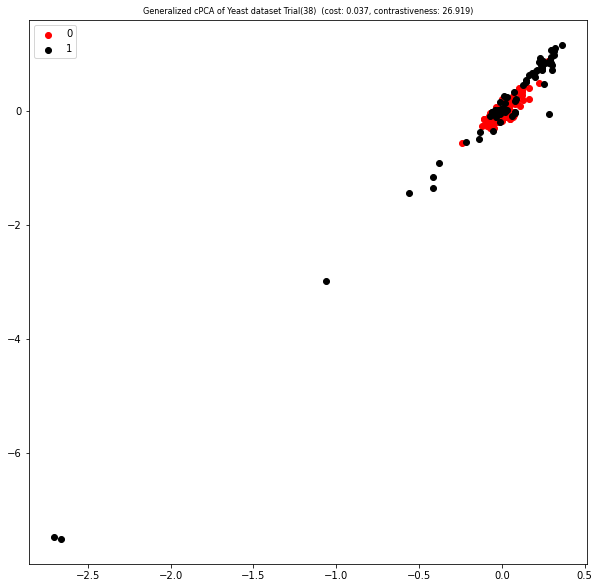

(1, 2, 5)
[3, 4, 6, 7, 8]
[[ 2.46770424e-01  1.97151561e-01]
 [-8.94501346e-02 -6.98940956e-02]
 [ 1.43438514e-01  1.16943906e-01]
 [ 2.80259235e-02  1.44766238e-01]
 [-1.71106322e-01 -9.33556887e-02]
 [ 3.28632353e-01  2.26006469e-01]
 [-2.51424327e-01 -1.67847804e-01]
 [-3.51085432e-01 -2.19564736e-01]
 [ 9.01999368e-02  3.17462137e-02]
 [ 7.84110194e-02  1.04061330e-03]
 [ 2.02403948e-01  1.47994619e-01]
 [ 6.09832756e-02  1.86963098e-02]
 [-2.55661941e-02 -7.39640816e-03]
 [-7.21322196e-02 -5.63332703e-02]
 [ 1.25328839e-02 -1.26314256e-03]
 [-1.22539049e-01 -4.37908426e-02]
 [-3.23046673e-02 -5.24873595e-02]
 [-2.32161243e-02  5.48287395e-02]
 [ 2.38485343e-01  1.42238919e-01]
 [ 4.98850965e-01  2.49144789e-01]
 [ 2.96313550e-01  2.39703090e-01]
 [-6.88138476e-01 -4.27180632e-01]
 [ 1.87797406e-01  1.55259545e-01]
 [ 1.35583378e-01  3.54849415e-02]
 [-9.54972095e-02 -4.28384723e-02]
 [-5.85599420e-02 -6.15588152e-02]
 [ 1.48342795e-01  1.39630521e-01]
 [ 5.09140536e-02  9.77827296

<Figure size 432x288 with 0 Axes>

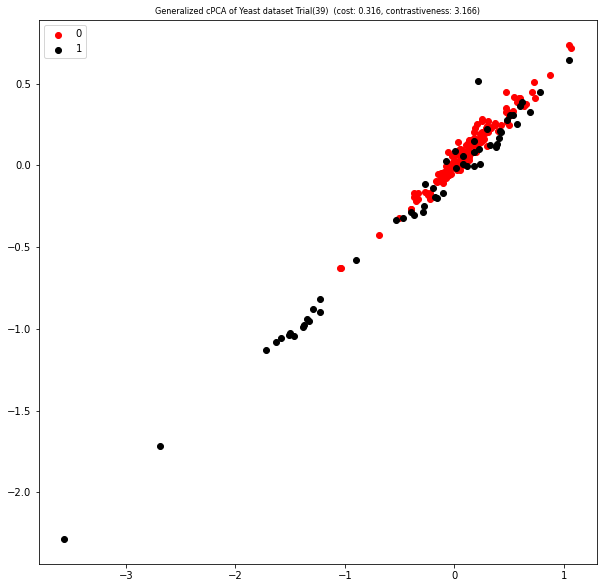

(1, 2, 6)
[3, 4, 5, 7, 8]
[[ 6.32865799e-02 -3.86078996e-01]
 [ 7.95102624e-03  4.57138780e-04]
 [ 4.81495710e-02 -2.84883014e-01]
 [-1.31336981e-01  1.18961229e-01]
 [-2.56268016e-02  5.92716494e-02]
 [ 1.75627019e-03 -8.38081316e-02]
 [-2.46064183e-02  1.47079585e-01]
 [-3.23820822e-02  1.40100431e-01]
 [-3.83077191e-02  2.39297299e-01]
 [ 3.91149652e-02  1.03495236e-02]
 [-9.54563552e-03 -4.13903774e-02]
 [ 1.32640622e-04  1.06245909e-01]
 [-2.51176246e-02  5.64576915e-02]
 [ 1.93251589e-02 -5.68742735e-02]
 [ 9.61207157e-03  1.43390342e-02]
 [-4.02240968e-02  6.37622776e-02]
 [ 1.55595135e-03  1.48527797e-01]
 [-5.13327096e-02 -2.19027387e-02]
 [ 1.21270662e-01 -4.35426512e-01]
 [ 8.69301999e-02 -1.15391482e-01]
 [-2.24779657e-02 -9.62766698e-02]
 [ 1.83066238e-02 -4.80765280e-02]
 [-4.28234395e-02  1.05082758e-01]
 [ 2.53404641e-02  1.07933757e-01]
 [-2.12518131e-02  6.35537790e-02]
 [-2.51744585e-02  2.22309330e-01]
 [-6.37580602e-02  1.18997131e-01]
 [-5.35223595e-02  1.88838155

<Figure size 432x288 with 0 Axes>

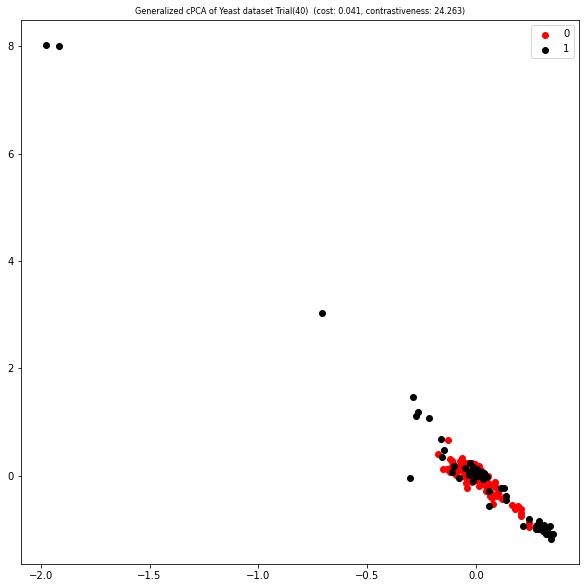

(1, 2, 7)
[3, 4, 5, 6, 8]
[[ 4.11123820e-01 -7.67227488e-01]
 [ 4.27815973e-02 -1.16570835e-01]
 [ 1.69308219e-01 -2.84055052e-01]
 [ 1.67676355e-01 -1.24009785e-01]
 [ 1.40344097e-01 -2.64137483e-01]
 [ 1.38752809e-01 -2.31695498e-01]
 [ 1.00937244e-01 -2.32433292e-01]
 [ 1.57781359e-01 -3.23180508e-01]
 [-9.70501401e-02  1.17433955e-01]
 [ 1.13894483e-01 -3.22999909e-01]
 [ 1.35222197e-01 -2.19526876e-01]
 [ 1.34434966e-01 -3.31114357e-01]
 [ 1.09207764e-01 -1.86748237e-01]
 [ 2.11713817e-01 -4.33487270e-01]
 [ 2.05212060e-01 -4.44475645e-01]
 [ 2.02862161e-01 -3.57774611e-01]
 [ 1.52618215e-01 -3.91563113e-01]
 [ 1.75326986e-01 -2.47572688e-01]
 [ 2.57499926e-01 -5.32285736e-01]
 [ 5.78368208e-02 -2.50889903e-01]
 [ 1.99751926e-01 -3.00050862e-01]
 [ 2.00269617e-01 -3.85471562e-01]
 [ 1.44564665e-01 -2.51073852e-01]
 [ 8.46456518e-02 -2.88012218e-01]
 [ 1.09262859e-01 -1.99485893e-01]
 [ 6.46342662e-02 -2.00849965e-01]
 [ 7.36197140e-02 -8.65173538e-02]
 [ 1.88457380e-01 -2.71027456

<Figure size 432x288 with 0 Axes>

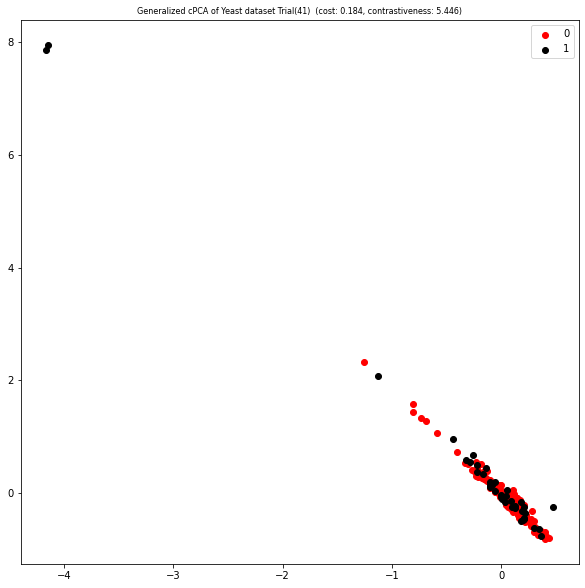

(1, 2, 8)
[3, 4, 5, 6, 7]
[[ 2.60924893e-01  3.41404744e-01]
 [ 3.11512197e-03 -6.49923618e-03]
 [ 1.78639872e-01  2.42566211e-01]
 [-1.47259000e-01 -3.00566089e-02]
 [-4.95795446e-02 -4.23166636e-02]
 [ 7.30765821e-02  1.04371504e-01]
 [-9.47859928e-02 -1.28408066e-01]
 [-1.04137489e-01 -1.23797860e-01]
 [-1.23564723e-01 -1.83098737e-01]
 [ 4.69733064e-02 -1.27585200e-02]
 [ 3.39044865e-02  6.27001311e-02]
 [-2.36843717e-02 -7.67567255e-02]
 [-4.22075700e-02 -3.45774243e-02]
 [ 4.70751809e-02  4.58492366e-02]
 [ 2.33101225e-02  6.29498851e-04]
 [-5.45437639e-02 -3.15383469e-02]
 [-4.66618225e-02 -1.20671895e-01]
 [-3.25089003e-02  3.97520497e-02]
 [ 3.09652720e-01  3.38635270e-01]
 [ 1.75514253e-01  1.05691042e-01]
 [ 5.81445729e-02  1.26203307e-01]
 [-3.62388510e-02 -3.89313954e-02]
 [-5.19354928e-02 -4.95283805e-02]
 [ 1.63176758e-03 -8.58630167e-02]
 [-4.93664129e-02 -5.20278708e-02]
 [-1.08662701e-01 -1.78788013e-01]
 [-8.19955217e-02 -5.48459152e-02]
 [-3.60439387e-02  2.32090470

<Figure size 432x288 with 0 Axes>

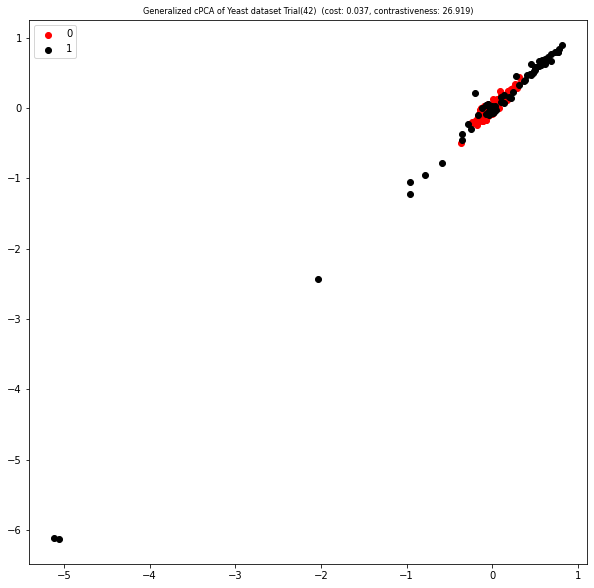

(1, 3, 4)
[2, 5, 6, 7, 8]
[[ 2.24007128e-01 -1.47347835e-01]
 [ 2.21227013e-01 -7.61030459e-02]
 [-5.38083754e-02 -1.42522336e-01]
 [ 3.68589329e-01  4.39453117e-02]
 [ 2.84549255e-01 -4.96607171e-02]
 [ 2.08932811e-01 -1.05182503e-01]
 [ 3.43921252e-01 -4.60720669e-02]
 [ 3.49750122e-01 -3.55468867e-02]
 [ 3.97760293e-01 -2.98495763e-02]
 [ 2.35807928e-01 -1.26501308e-01]
 [ 1.84890990e-01 -9.02713137e-02]
 [ 3.06443985e-01 -9.49526079e-02]
 [ 2.66437594e-01 -5.91900482e-02]
 [ 2.00467014e-01 -9.98188477e-02]
 [ 2.15038003e-01 -1.04608183e-01]
 [ 2.53893577e-01 -4.50123110e-02]
 [ 3.45568396e-01 -9.29332012e-02]
 [ 2.83004473e-01 -4.18503192e-03]
 [-1.56860819e-01 -2.10498906e-01]
 [ 6.52755090e-02 -1.98162159e-01]
 [ 1.56881117e-01 -7.79997226e-02]
 [ 2.04560545e-01 -4.69332987e-02]
 [ 2.82249554e-01 -6.20243953e-02]
 [ 2.61176645e-01 -1.23729176e-01]
 [ 2.11232243e-01 -6.04239091e-02]
 [ 3.62142022e-01 -5.98220289e-02]
 [ 2.60844454e-01 -2.76823995e-02]
 [ 1.80811692e-01 -4.26807686

<Figure size 432x288 with 0 Axes>

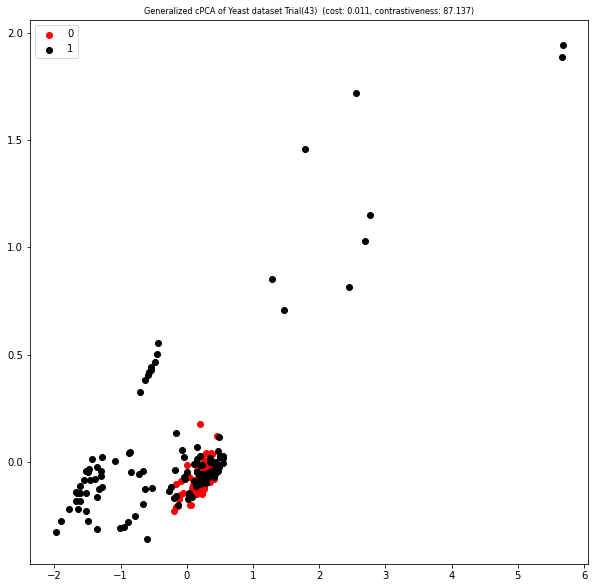

(1, 3, 5)
[2, 4, 6, 7, 8]
[[-1.15790414e-01 -1.13269048e+00]
 [-8.25250365e-02 -1.01052863e+00]
 [-1.08336573e-01 -1.00990042e+00]
 [-1.65813427e-01 -8.27412700e-01]
 [-8.01264460e-02 -8.34467257e-01]
 [-5.53073803e-02 -7.97148964e-01]
 [-5.74342399e-02 -8.00092770e-01]
 [-6.12880717e-02 -7.50748486e-01]
 [-5.62111201e-02 -8.65318694e-01]
 [-2.67096623e-03 -6.98641393e-01]
 [-5.19521433e-02 -7.07411014e-01]
 [-2.05396839e-02 -6.45982383e-01]
 [-4.84125838e-02 -7.12461798e-01]
 [-2.91924612e-02 -6.56348090e-01]
 [-2.52478651e-02 -5.86847830e-01]
 [-6.95137689e-02 -6.24840343e-01]
 [-2.91987714e-03 -5.80832747e-01]
 [-1.30460956e-01 -8.34397164e-01]
 [-6.30367387e-02 -8.76714184e-01]
 [ 1.40283639e-02 -6.99739090e-01]
 [-7.23541709e-02 -6.35396233e-01]
 [-1.03759659e-01 -9.83565455e-01]
 [-6.09810931e-02 -6.16774413e-01]
 [ 8.07851149e-03 -6.03135018e-01]
 [-7.23846549e-02 -7.48116350e-01]
 [-1.94069193e-02 -6.18849261e-01]
 [-8.57569282e-02 -6.71620830e-01]
 [-9.48605029e-02 -6.31492596

<Figure size 432x288 with 0 Axes>

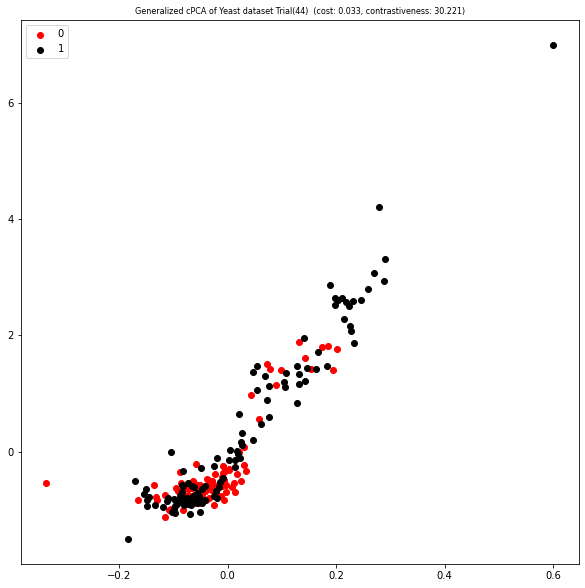

(1, 3, 6)
[2, 4, 5, 7, 8]
[[-3.57097202e-02  2.86666396e-01]
 [-5.76007120e-02  9.48421762e-02]
 [-4.83816755e-02  3.62189232e-01]
 [ 5.62533516e-02 -1.51881370e-02]
 [-4.03345854e-02  5.83120398e-02]
 [-4.64827848e-02  1.42523204e-01]
 [-5.85314080e-02  9.21050938e-04]
 [-5.10693476e-02  4.52178199e-03]
 [-5.00699557e-02 -1.07566000e-01]
 [-9.73919046e-02  1.00873863e-01]
 [-4.46296257e-02  1.36203273e-01]
 [-7.64359548e-02  4.88560708e-02]
 [-4.77444261e-02  5.50072365e-02]
 [-6.79478336e-02  1.37307396e-01]
 [-6.99110682e-02  1.22620859e-01]
 [-2.87815170e-02  7.36341991e-02]
 [-8.71589761e-02  1.96531584e-02]
 [ 1.64760238e-02  5.55879305e-02]
 [-8.68368061e-02  4.81775814e-01]
 [-1.17936465e-01  2.30847755e-01]
 [-1.59839238e-02  1.61674225e-01]
 [-5.84386437e-02  1.66689387e-01]
 [-3.30876948e-02  6.21582457e-02]
 [-1.01452934e-01  6.71834391e-02]
 [-4.56475925e-02  1.03169715e-01]
 [-7.22489260e-02 -3.46463148e-02]
 [-9.72102875e-03  2.75047247e-02]
 [-6.18895185e-03  1.25666306

<Figure size 432x288 with 0 Axes>

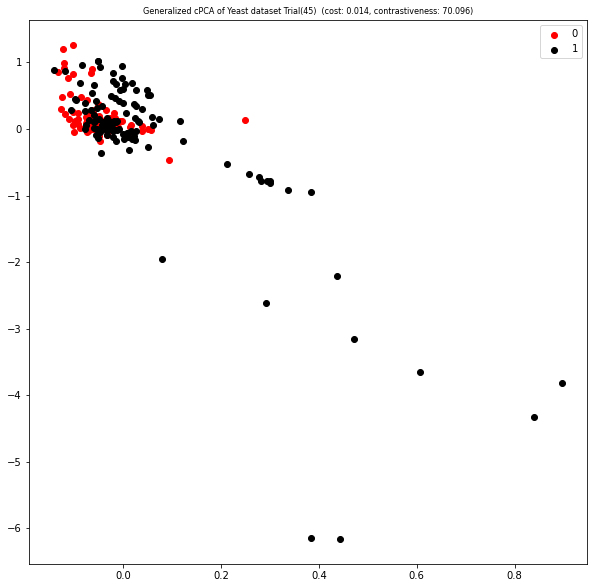

(1, 3, 7)
[2, 4, 5, 6, 8]
[[ 4.54746843e-01 -6.98640734e-01]
 [ 5.73974105e-01 -9.07734043e-01]
 [ 5.98779361e-01 -8.91723501e-01]
 [ 4.12237185e-01 -4.77700566e-01]
 [ 4.81224257e-01 -7.44606110e-01]
 [ 3.55986404e-01 -5.58012052e-01]
 [ 4.40995792e-01 -7.16224940e-01]
 [ 4.46601609e-01 -7.12335556e-01]
 [ 3.21564306e-01 -5.44472984e-01]
 [ 2.91941093e-01 -5.60746809e-01]
 [ 3.51281569e-01 -5.42962533e-01]
 [ 2.25541770e-01 -4.28791243e-01]
 [ 3.99619478e-01 -6.24934812e-01]
 [ 3.61397862e-01 -6.08330924e-01]
 [ 2.64795425e-01 -4.76165139e-01]
 [ 3.42826002e-01 -5.19482020e-01]
 [ 1.88342101e-01 -3.94605881e-01]
 [ 2.97935362e-01 -3.67267074e-01]
 [ 3.54785109e-01 -5.73413926e-01]
 [ 1.89127444e-01 -4.33512943e-01]
 [ 2.52258744e-01 -3.51444082e-01]
 [ 5.43464700e-01 -7.94101072e-01]
 [ 1.69927126e-01 -2.57401506e-01]
 [ 1.74523647e-01 -3.93921599e-01]
 [ 3.60984692e-01 -5.46450424e-01]
 [ 2.28452856e-01 -4.28444328e-01]
 [ 2.64932435e-01 -3.70944908e-01]
 [ 3.08847231e-01 -4.14833469

<Figure size 432x288 with 0 Axes>

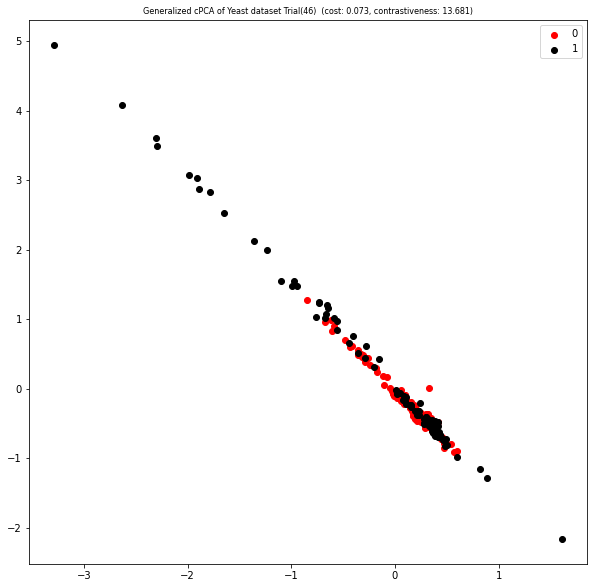

(1, 3, 8)
[2, 4, 5, 6, 7]
[[-5.98311448e-02  2.61343710e-01]
 [-1.07108996e-01  2.07976017e-01]
 [ 1.37453267e-01  6.56900203e-02]
 [-2.96567908e-01  2.23217178e-01]
 [-1.71129946e-01  2.32683661e-01]
 [-7.81142804e-02  2.20470557e-01]
 [-2.16488508e-01  2.71162207e-01]
 [-2.27979366e-01  2.67593971e-01]
 [-2.66587168e-01  2.96687812e-01]
 [-8.27779755e-02  2.54458848e-01]
 [-7.10684905e-02  1.93073540e-01]
 [-1.55611637e-01  2.80537269e-01]
 [-1.51458446e-01  2.27037169e-01]
 [-7.57145822e-02  2.10744137e-01]
 [-8.29246736e-02  2.24282566e-01]
 [-1.52208727e-01  2.08122810e-01]
 [-1.85263270e-01  3.06143269e-01]
 [-2.01469200e-01  1.98773447e-01]
 [ 2.58894100e-01  4.34957022e-02]
 [ 8.99441787e-02  1.88245769e-01]
 [-5.93296294e-02  1.64836256e-01]
 [-1.15253251e-01  1.75384284e-01]
 [-1.60916205e-01  2.40021640e-01]
 [-1.03016230e-01  2.70006175e-01]
 [-1.10738739e-01  1.89741663e-01]
 [-2.20135658e-01  2.93696585e-01]
 [-1.69213708e-01  2.00415037e-01]
 [-1.01044189e-01  1.55885599

<Figure size 432x288 with 0 Axes>

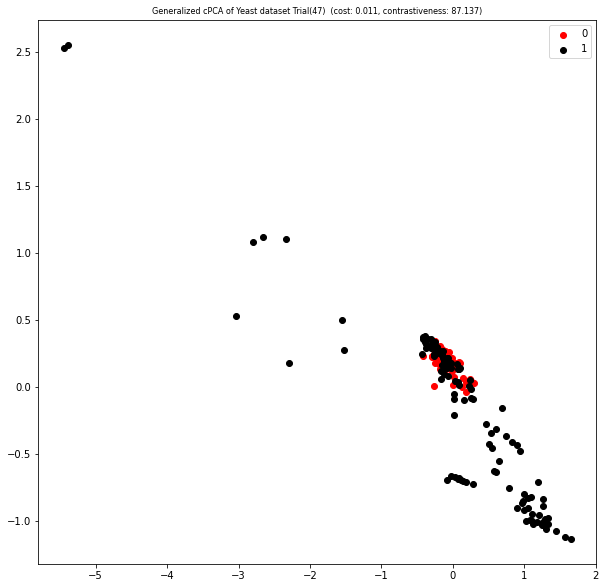

(1, 4, 5)
[2, 3, 6, 7, 8]
[[-1.02783468e+00 -4.93684956e-01]
 [-9.48587272e-01 -4.11733879e-01]
 [-9.27393570e-01 -4.36763549e-01]
 [-7.24060695e-01 -4.44188036e-01]
 [-7.70926000e-01 -3.65830042e-01]
 [-7.17670821e-01 -3.22382618e-01]
 [-7.48071824e-01 -3.36062744e-01]
 [-6.99751692e-01 -3.28548761e-01]
 [-8.12162281e-01 -3.33959314e-01]
 [-6.53577116e-01 -2.45212491e-01]
 [-6.37139844e-01 -2.92666828e-01]
 [-5.92738273e-01 -2.53531121e-01]
 [-6.53140263e-01 -2.93691425e-01]
 [-6.06556361e-01 -2.60047713e-01]
 [-5.34829785e-01 -2.39240480e-01]
 [-5.63861465e-01 -2.93163279e-01]
 [-5.36466145e-01 -2.20706911e-01]
 [-7.60038703e-01 -3.99974112e-01]
 [-8.12869829e-01 -3.50530400e-01]
 [-6.49158129e-01 -2.18545197e-01]
 [-5.57908458e-01 -2.86621100e-01]
 [-9.40770227e-01 -4.41082853e-01]
 [-5.45215012e-01 -2.82026917e-01]
 [-5.60480670e-01 -2.09065196e-01]
 [-6.89104762e-01 -3.30729020e-01]
 [-5.74637707e-01 -2.42349346e-01]
 [-6.00962928e-01 -3.10888383e-01]
 [-5.57036770e-01 -3.15217698

<Figure size 432x288 with 0 Axes>

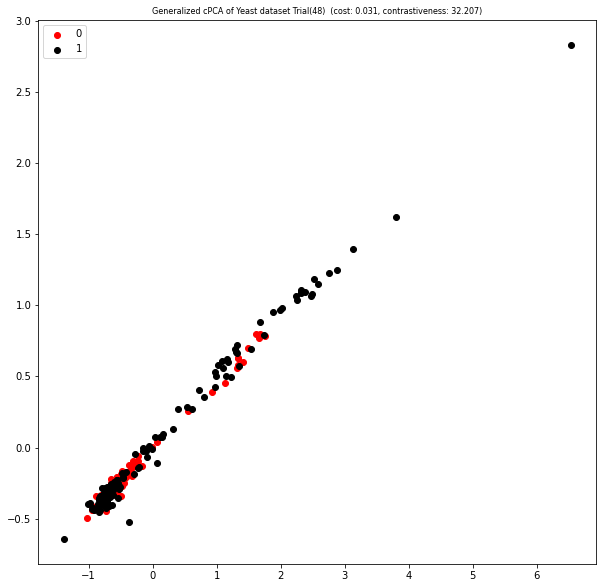

(1, 4, 6)
[2, 3, 5, 7, 8]
[[-1.68847634e-01 -2.29737796e-01]
 [ 2.50927974e-03 -5.84785618e-02]
 [-1.95324420e-01 -2.92077242e-01]
 [-3.54280361e-02  9.78494337e-02]
 [-1.65928690e-02 -3.97245277e-02]
 [-2.95624828e-02 -5.08985619e-02]
 [ 3.25847842e-02 -4.54093605e-03]
 [ 1.23842839e-02 -1.50029111e-02]
 [ 1.54668075e-01  1.47683497e-01]
 [ 1.44868587e-02 -8.55152467e-02]
 [-3.54797298e-02 -5.55462074e-02]
 [ 7.54327995e-03 -5.53414144e-02]
 [ 1.79595708e-02  6.03182190e-03]
 [-3.85053294e-02 -1.02486670e-01]
 [-5.40427503e-02 -1.24115812e-01]
 [-5.02589628e-02 -5.57281511e-02]
 [ 2.49872074e-02 -4.66474079e-02]
 [-2.14468981e-02  2.76004502e-02]
 [-2.44896210e-01 -4.21912035e-01]
 [-3.91454344e-02 -1.93154031e-01]
 [-7.52477392e-02 -6.41019566e-02]
 [-7.70008191e-02 -1.63354604e-01]
 [-3.23371619e-02 -3.34835713e-02]
 [ 2.13374265e-02 -8.02891610e-02]
 [-4.10628027e-02 -7.87478992e-02]
 [ 6.62074027e-02  2.32587518e-02]
 [-7.63252596e-04  3.02109481e-02]
 [-9.34445024e-02 -7.53852457

<Figure size 432x288 with 0 Axes>

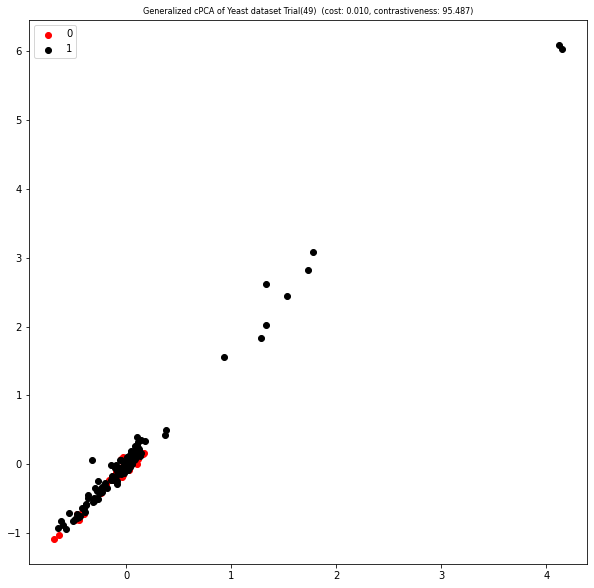

(1, 4, 7)
[2, 3, 5, 6, 8]
[[ 8.44384849e-01  2.19484027e-01]
 [ 9.47970158e-01  3.21717514e-01]
 [ 9.73243173e-01  2.76548964e-01]
 [ 6.05669961e-01  7.87960143e-02]
 [ 8.52472327e-01  2.50735808e-01]
 [ 6.10140572e-01  1.74706750e-01]
 [ 8.17798364e-01  2.61113709e-01]
 [ 8.56410305e-01  2.56934026e-01]
 [ 4.90154233e-01  2.05078386e-01]
 [ 6.05962367e-01  2.28205862e-01]
 [ 6.16320161e-01  1.71214967e-01]
 [ 4.94345416e-01  1.59909729e-01]
 [ 7.19504881e-01  2.16418465e-01]
 [ 7.31858155e-01  2.28193033e-01]
 [ 5.75384902e-01  1.69373787e-01]
 [ 6.53558658e-01  1.60668790e-01]
 [ 4.79895565e-01  1.61581147e-01]
 [ 4.76217578e-01  1.02743755e-01]
 [ 6.71046642e-01  2.05510366e-01]
 [ 3.81589466e-01  1.76485290e-01]
 [ 4.36301949e-01  8.55422752e-02]
 [ 1.04080050e+00  3.14169024e-01]
 [ 3.35538556e-01  5.94960998e-02]
 [ 4.18043120e-01  1.64611440e-01]
 [ 6.49630841e-01  1.81398639e-01]
 [ 4.83723651e-01  1.67412451e-01]
 [ 4.13147815e-01  9.23434320e-02]
 [ 5.33681675e-01  9.63041503

<Figure size 432x288 with 0 Axes>

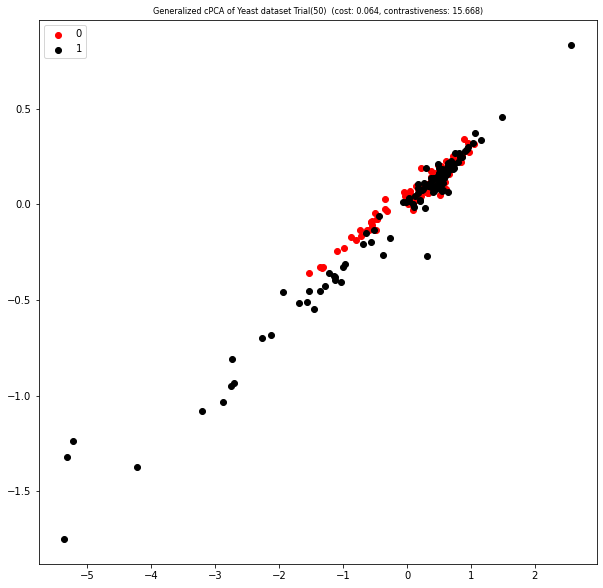

(1, 4, 8)
[2, 3, 5, 6, 7]
[[-5.68819179e-03  9.60426424e-02]
 [-1.06272961e-02  1.22508174e-01]
 [-1.09003630e-01 -1.57433797e-01]
 [ 1.77578684e-01  2.61693172e-01]
 [ 3.83351893e-02  1.57362056e-01]
 [ 3.18920416e-02  1.72502147e-01]
 [ 4.66662630e-02  2.15251847e-01]
 [ 5.52221608e-02  2.00866873e-01]
 [ 8.82741148e-02  3.70357594e-01]
 [-1.74310195e-02  1.70167849e-01]
 [ 2.75002863e-02  1.37844074e-01]
 [ 2.87577533e-02  2.13666782e-01]
 [ 5.29217941e-02  1.98621918e-01]
 [-1.93921570e-03  1.12735727e-01]
 [-2.80805596e-03  1.09628249e-01]
 [ 5.10289958e-02  1.34380176e-01]
 [ 3.50314569e-02  2.41139843e-01]
 [ 1.04807704e-01  2.24533999e-01]
 [-1.76656494e-01 -2.24719207e-01]
 [-9.74765615e-02  5.79941128e-02]
 [ 4.74033644e-02  1.24229163e-01]
 [-2.00147219e-02  3.51412558e-02]
 [ 7.16362494e-02  2.05371230e-01]
 [-8.28648299e-03  1.91471774e-01]
 [ 1.86351082e-02  1.09458575e-01]
 [ 5.86444847e-02  2.74199826e-01]
 [ 8.37441568e-02  2.06041545e-01]
 [ 5.18096850e-02  8.60097374

<Figure size 432x288 with 0 Axes>

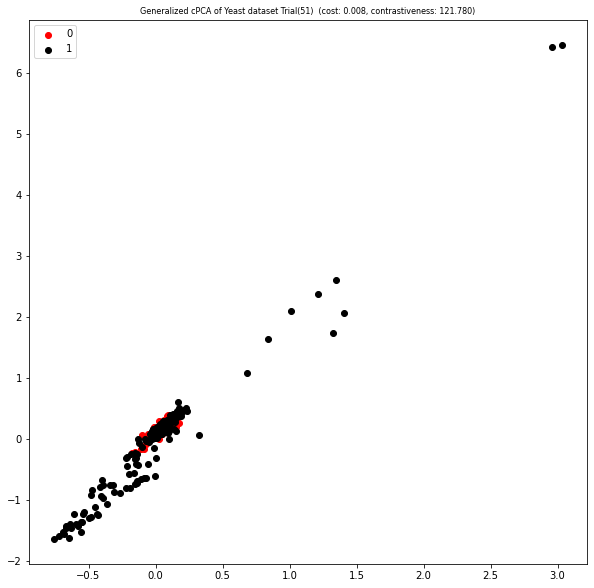

(1, 5, 6)
[2, 3, 4, 7, 8]
[[ 0.89631834 -0.32391769]
 [ 0.79886708 -0.24200066]
 [ 0.84057331 -0.29436493]
 [ 0.60501146 -0.30758196]
 [ 0.57140202 -0.19454784]
 [ 0.6482619  -0.21349659]
 [ 0.52943129 -0.15933263]
 [ 0.44335517 -0.14104088]
 [ 0.74603078 -0.21550122]
 [ 0.51637136 -0.11699578]
 [ 0.54355511 -0.18186786]
 [ 0.44618021 -0.12664777]
 [ 0.49887877 -0.15503434]
 [ 0.42218863 -0.11589589]
 [ 0.36499471 -0.10974235]
 [ 0.37512637 -0.14974159]
 [ 0.35534319 -0.0859336 ]
 [ 0.68763611 -0.27957863]
 [ 0.78581395 -0.24606997]
 [ 0.64871092 -0.15003716]
 [ 0.50567226 -0.20160534]
 [ 0.6936155  -0.22182861]
 [ 0.46125452 -0.18361374]
 [ 0.44370874 -0.09957493]
 [ 0.55309751 -0.19272829]
 [ 0.41564665 -0.11141215]
 [ 0.5339729  -0.21358343]
 [ 0.44317812 -0.20210714]
 [ 0.36809819 -0.15713004]
 [ 0.44821542 -0.16877283]
 [ 0.35573953 -0.07255248]
 [ 0.3457274  -0.10880314]
 [ 0.22678305 -0.05503531]
 [ 0.32310674 -0.04917466]
 [ 0.38125709 -0.13136637]
 [ 0.63063439 -0.20372636]
 [

<Figure size 432x288 with 0 Axes>

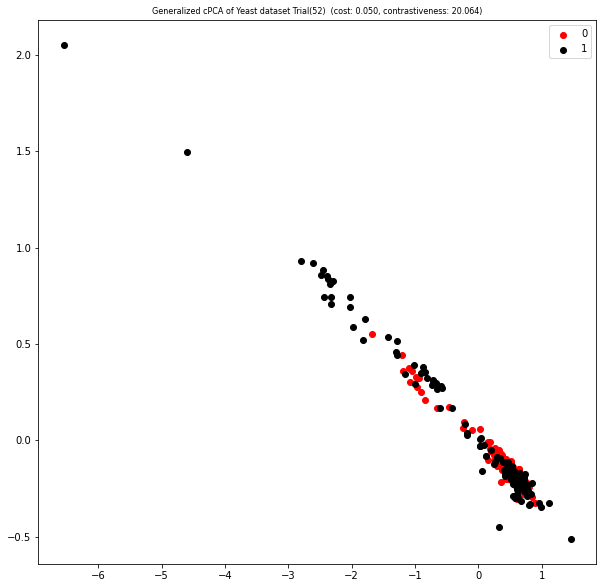

(1, 5, 7)
[2, 3, 4, 6, 8]
[[ 5.59149563e-01  2.67734107e-01]
 [ 1.07008522e+00  5.58241135e-01]
 [ 9.82223425e-01  4.69083025e-01]
 [ 6.05569386e-01  1.95171628e-01]
 [ 8.25582186e-01  4.10860865e-01]
 [ 4.24850612e-01  2.15573181e-01]
 [ 8.13919077e-01  4.27971049e-01]
 [ 7.94699063e-01  4.09254509e-01]
 [ 6.87013779e-01  3.81208171e-01]
 [ 4.53811170e-01  2.89612769e-01]
 [ 4.45288836e-01  2.21422247e-01]
 [ 3.46954767e-01  2.03618854e-01]
 [ 5.98328729e-01  3.10926974e-01]
 [ 4.99470601e-01  2.81320549e-01]
 [ 3.54515737e-01  1.96966654e-01]
 [ 5.07366247e-01  2.33482293e-01]
 [ 2.90357019e-01  1.88588182e-01]
 [ 5.08876575e-01  2.12455201e-01]
 [ 5.58724146e-01  2.97220503e-01]
 [ 2.54073802e-01  1.98052115e-01]
 [ 2.18367322e-01  7.90174662e-02]
 [ 1.16906877e+00  5.96547169e-01]
 [ 2.12181453e-01  8.03072741e-02]
 [ 2.88355417e-01  2.00691532e-01]
 [ 6.61953118e-01  3.22505526e-01]
 [ 4.25760417e-01  2.47196681e-01]
 [ 4.16035292e-01  1.73671625e-01]
 [ 4.27600844e-01  1.59501387

<Figure size 432x288 with 0 Axes>

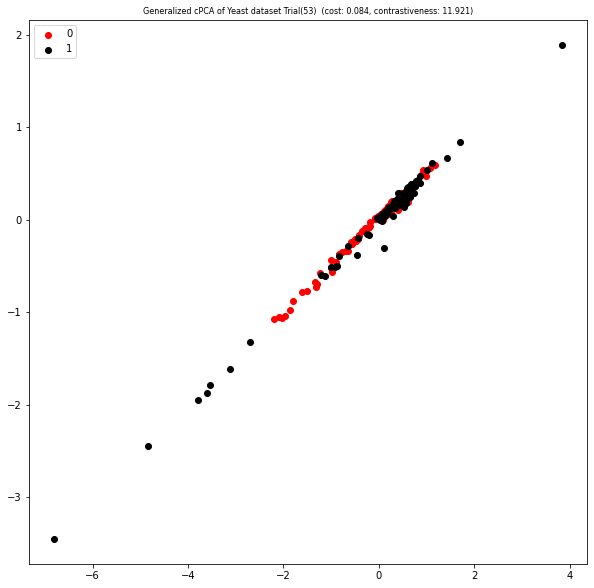

(1, 5, 8)
[2, 3, 4, 6, 7]
[[ 8.32638055e-01  7.79026913e-01]
 [ 7.27537281e-01  7.34869176e-01]
 [ 7.43183919e-01  7.06044809e-01]
 [ 6.76409641e-01  5.13845502e-01]
 [ 6.20364630e-01  5.85923913e-01]
 [ 5.60569687e-01  5.52035907e-01]
 [ 5.84338180e-01  5.75412182e-01]
 [ 5.59822429e-01  5.33100639e-01]
 [ 6.05605869e-01  6.35907285e-01]
 [ 4.65416863e-01  5.20268766e-01]
 [ 5.03687440e-01  4.87750113e-01]
 [ 4.51120099e-01  4.60551390e-01]
 [ 5.10441504e-01  5.02291454e-01]
 [ 4.62201766e-01  4.71068252e-01]
 [ 4.16813286e-01  4.11759424e-01]
 [ 4.77591934e-01  4.19274081e-01]
 [ 4.00132895e-01  4.20001685e-01]
 [ 6.48241229e-01  5.63401797e-01]
 [ 6.21306739e-01  6.30560818e-01]
 [ 4.38960904e-01  5.25815017e-01]
 [ 4.69336820e-01  4.16096653e-01]
 [ 7.52058004e-01  7.16946953e-01]
 [ 4.60454587e-01  4.05931375e-01]
 [ 3.97986210e-01  4.46602697e-01]
 [ 5.57995600e-01  5.22387239e-01]
 [ 4.34138416e-01  4.47734127e-01]
 [ 5.07558489e-01  4.47428760e-01]
 [ 4.95673360e-01  4.04920103

<Figure size 432x288 with 0 Axes>

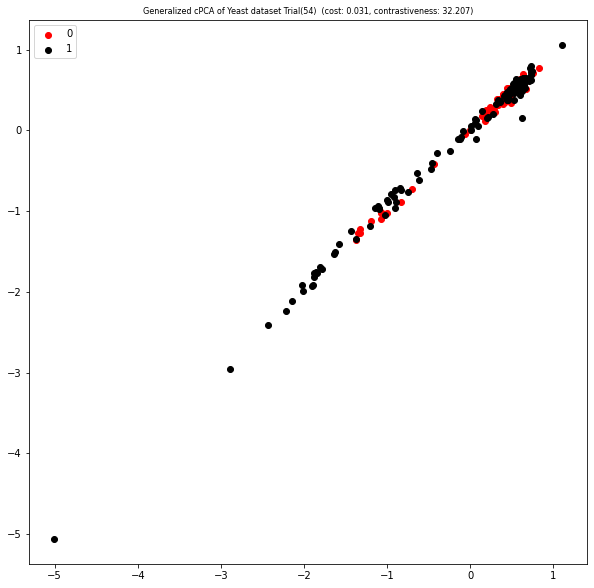

(1, 6, 7)
[2, 3, 4, 5, 8]
[[-3.26508058e-01  9.16261031e-01]
 [-8.53016575e-02  4.15181134e-01]
 [-1.96461319e-01  5.89668058e-01]
 [-2.31180045e-01  4.15181257e-01]
 [-1.98667824e-01  6.16719596e-01]
 [-1.24058405e-01  3.87051629e-01]
 [-1.73385359e-01  5.99501367e-01]
 [-2.30178614e-01  7.18830525e-01]
 [ 5.89760934e-02  3.48956225e-02]
 [-1.22550262e-01  5.37877548e-01]
 [-1.40459088e-01  4.15285178e-01]
 [-1.86147792e-01  6.16919265e-01]
 [-1.31373639e-01  4.29896982e-01]
 [-2.03450687e-01  6.64598032e-01]
 [-2.44232003e-01  7.46617208e-01]
 [-2.56609707e-01  6.87429941e-01]
 [-2.08354314e-01  6.96560240e-01]
 [-1.34491307e-01  3.00017371e-01]
 [-2.04027776e-01  6.48220361e-01]
 [-4.84082264e-02  3.65509148e-01]
 [-1.73121382e-01  4.09500249e-01]
 [-2.27217203e-01  6.98387329e-01]
 [-2.02678316e-01  5.02182982e-01]
 [-1.34486765e-01  5.44448223e-01]
 [-1.73878230e-01  5.04696144e-01]
 [-1.36108769e-01  4.97332482e-01]
 [-1.21805173e-01  2.96791324e-01]
 [-2.41687244e-01  5.55868477

<Figure size 432x288 with 0 Axes>

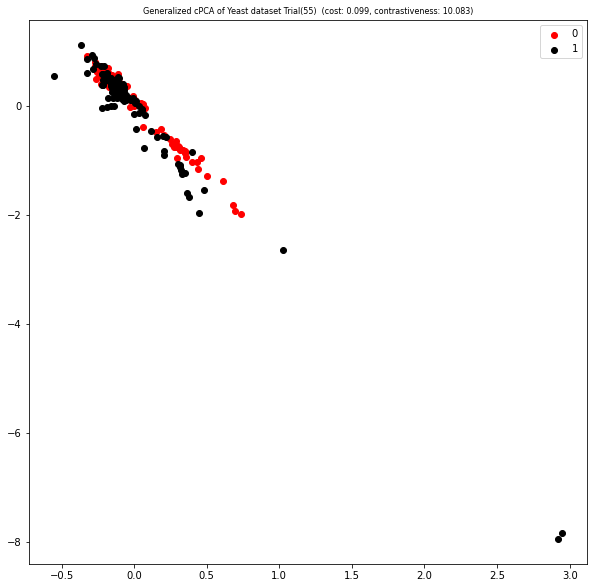

(1, 6, 8)
[2, 3, 4, 5, 7]
[[ 6.57820864e-02 -2.77423700e-01]
 [ 4.61911168e-02 -3.59515607e-02]
 [ 9.61538116e-02 -3.37961100e-01]
 [-9.75153158e-02  3.63402573e-02]
 [ 1.95311549e-02 -3.83674449e-02]
 [ 1.96514305e-02 -5.54881821e-02]
 [ 2.45530449e-02  2.18911428e-02]
 [ 1.94490459e-02 -2.76839896e-04]
 [-1.24300165e-02  2.13483326e-01]
 [ 7.45517666e-02 -4.43247551e-02]
 [ 1.93628896e-02 -6.30060356e-02]
 [ 4.70594021e-02 -3.00820919e-02]
 [ 7.02697737e-03  1.75885166e-02]
 [ 5.31798925e-02 -9.56990392e-02]
 [ 5.96058441e-02 -1.21542917e-01]
 [ 9.93333415e-03 -7.43855861e-02]
 [ 5.17262973e-02 -1.11579846e-02]
 [-3.49236592e-02  1.51666449e-03]
 [ 1.63015719e-01 -4.59796478e-01]
 [ 1.21868205e-01 -1.54886702e-01]
 [ 1.38102334e-04 -9.88541168e-02]
 [ 7.46487316e-02 -1.64445764e-01]
 [ 4.58211408e-03 -4.63273218e-02]
 [ 7.50037268e-02 -3.57199792e-02]
 [ 3.34315233e-02 -8.22814120e-02]
 [ 2.51325171e-02  6.55140377e-02]
 [-2.35224947e-02  1.89717421e-02]
 [-3.04281884e-03 -1.20026482

<Figure size 432x288 with 0 Axes>

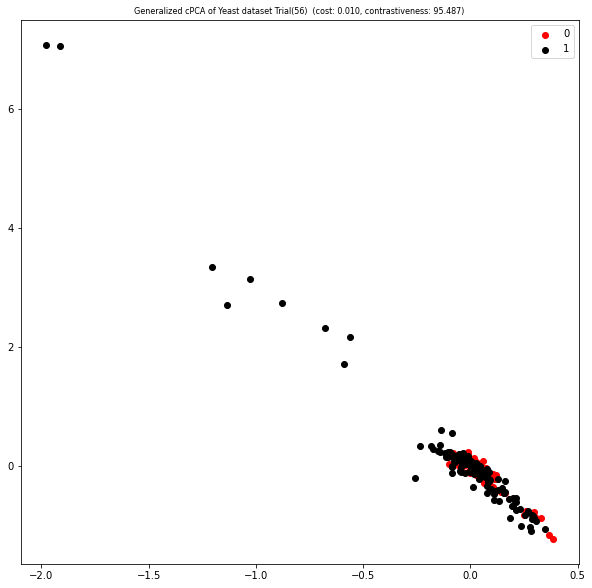

(1, 7, 8)
[2, 3, 4, 5, 6]
[[ 6.23515190e-01 -6.10236780e-01]
 [ 7.64522074e-01 -6.46258396e-01]
 [ 7.38857963e-01 -6.91205457e-01]
 [ 3.79866697e-01 -4.78272156e-01]
 [ 6.54458838e-01 -6.01047534e-01]
 [ 4.64344816e-01 -4.32638952e-01]
 [ 6.45467564e-01 -5.65988124e-01]
 [ 6.61800165e-01 -6.01224753e-01]
 [ 4.28484568e-01 -3.14176962e-01]
 [ 5.08026064e-01 -4.01468846e-01]
 [ 4.64540055e-01 -4.39734077e-01]
 [ 3.91949669e-01 -3.41062506e-01]
 [ 5.56482644e-01 -5.04825226e-01]
 [ 5.72942983e-01 -5.09337284e-01]
 [ 4.41852951e-01 -4.05613008e-01]
 [ 4.74710255e-01 -4.77077764e-01]
 [ 3.85929827e-01 -3.27820623e-01]
 [ 3.33622522e-01 -3.55013439e-01]
 [ 5.22146255e-01 -4.68934140e-01]
 [ 3.47999992e-01 -2.35910301e-01]
 [ 2.98301016e-01 -3.29686966e-01]
 [ 8.05927287e-01 -7.29682312e-01]
 [ 2.24018906e-01 -2.56789572e-01]
 [ 3.56626923e-01 -2.73265496e-01]
 [ 4.90442748e-01 -4.63020577e-01]
 [ 3.92899029e-01 -3.28092718e-01]
 [ 2.92185643e-01 -3.06341757e-01]
 [ 3.57741619e-01 -4.07566838

<Figure size 432x288 with 0 Axes>

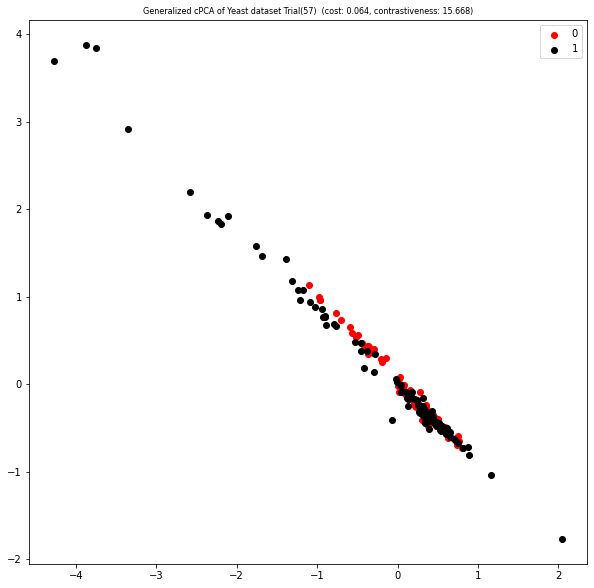

(2, 3, 4)
[1, 5, 6, 7, 8]
[[ 3.32561051e-01 -4.33075004e-01]
 [ 1.22491485e-02 -8.36343821e-03]
 [ 1.88562205e-01 -2.33010767e-01]
 [ 2.25047704e-02  1.16442302e-01]
 [-2.96037084e-02  6.00746237e-02]
 [ 7.41524371e-02 -1.17360320e-01]
 [-1.05387691e-01  1.28665673e-01]
 [-1.05537105e-01  1.43534500e-01]
 [-9.55665055e-02  1.17921544e-01]
 [-2.47481933e-02 -5.46943782e-02]
 [ 3.12632971e-02 -5.14841209e-02]
 [-7.16891720e-02  2.50487001e-02]
 [-4.72503942e-02  5.88345567e-02]
 [ 2.03537445e-02 -5.59235914e-02]
 [-1.65904097e-02 -2.53409806e-02]
 [-2.74628446e-02  6.22839215e-02]
 [-1.14077044e-01  6.29122298e-02]
 [ 1.23651235e-01 -6.71579039e-02]
 [ 2.81580665e-01 -4.33815390e-01]
 [ 7.11469443e-02 -2.29163362e-01]
 [ 1.12116059e-01 -1.21191730e-01]
 [-9.84390008e-03  2.36487781e-02]
 [-3.69057931e-02  3.12539792e-02]
 [-8.71797186e-02  4.54932021e-03]
 [-4.30775945e-02  5.37975797e-02]
 [-1.49766163e-01  1.40292069e-01]
 [-1.67945666e-02  6.36981480e-02]
 [ 2.38316641e-02  1.91558443

<Figure size 432x288 with 0 Axes>

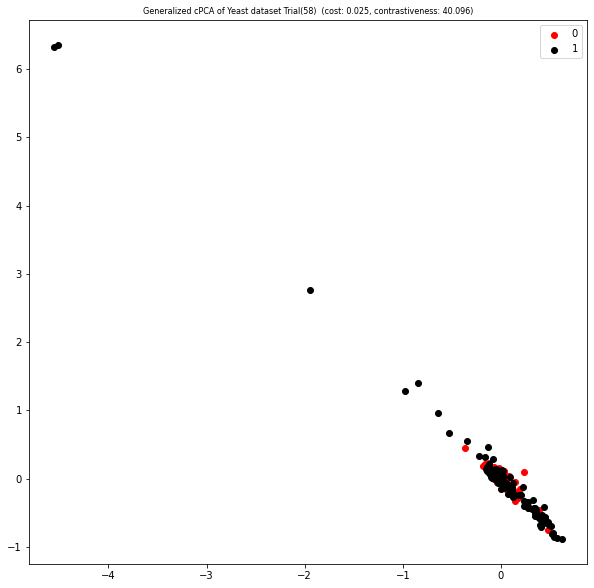

(2, 3, 5)
[1, 4, 6, 7, 8]
[[-5.66857916e-02 -4.26714386e-02]
 [-2.58804914e-01  2.11637667e-02]
 [ 1.26056635e-01 -2.21044020e-02]
 [-1.40254572e-02 -1.05436045e-01]
 [-2.78040751e-01  7.42956259e-03]
 [ 5.15417026e-01 -1.70044983e-02]
 [-3.61472365e-01  2.60824134e-02]
 [-4.59891724e-01  2.30980944e-02]
 [-1.56471683e-01  1.99029895e-02]
 [ 4.17853501e-02  5.42037094e-02]
 [ 4.00321218e-01 -1.24320946e-02]
 [-8.15354172e-03  3.01069769e-02]
 [ 1.36594678e-01  2.99161024e-03]
 [-5.54003794e-02  2.97632005e-02]
 [-5.92245596e-02  3.43513500e-02]
 [-1.89565399e-01 -3.19779574e-03]
 [-1.10510839e-01  4.49698818e-02]
 [-3.50117473e-01 -7.95216068e-02]
 [ 1.00097399e-01 -1.87724362e-02]
 [ 4.68650189e-01  5.56718099e-02]
 [ 3.87685108e-01 -4.39825845e-02]
 [-8.85514905e-01 -3.95695123e-02]
 [ 1.96382733e-01 -3.37475762e-02]
 [ 6.77691983e-02  5.46721673e-02]
 [-1.28738410e-01 -1.72976214e-02]
 [-1.39824834e-01  3.46633922e-02]
 [ 7.28902833e-02 -3.45981603e-02]
 [ 4.81474724e-02 -4.55422538

<Figure size 432x288 with 0 Axes>

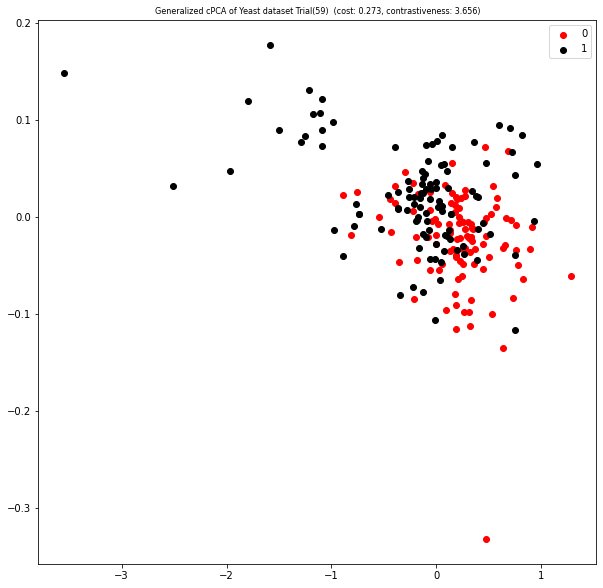

(2, 3, 6)
[1, 4, 5, 7, 8]
[[ 4.57564615e-03  4.87350230e-01]
 [-1.55496606e-03  2.13524544e-02]
 [ 3.84722809e-03  2.83076086e-01]
 [-1.07226286e-01 -1.20351806e-01]
 [-1.88493851e-02 -7.16120178e-02]
 [ 1.32483138e-03  6.16770969e-02]
 [-3.18836763e-03 -1.58741356e-01]
 [-1.13529620e-02 -1.62605548e-01]
 [-1.14219354e-02 -1.80129908e-01]
 [ 4.33459585e-02 -1.57110351e-02]
 [-4.02006881e-03  1.32183681e-03]
 [ 2.25409025e-02 -1.18463294e-01]
 [-7.50621857e-03 -9.86248173e-02]
 [ 1.43261255e-02  3.28243343e-02]
 [ 1.49107771e-02 -4.53182490e-02]
 [-2.82767594e-02 -9.58235642e-02]
 [ 3.14191837e-02 -1.66456072e-01]
 [-5.88401497e-02  1.37114923e-01]
 [ 5.83462631e-02  5.09799188e-01]
 [ 7.22229128e-02  1.27382339e-01]
 [-2.70894858e-02  8.83194734e-02]
 [ 1.58938270e-02  1.36697048e-01]
 [-1.33500480e-02 -1.14218090e-01]
 [ 4.70098207e-02 -1.19272942e-01]
 [-5.41043186e-03 -6.43712111e-02]
 [ 1.28198691e-02 -2.35379173e-01]
 [-4.36226822e-02 -1.15677082e-01]
 [-4.38293518e-02 -4.45964717

<Figure size 432x288 with 0 Axes>

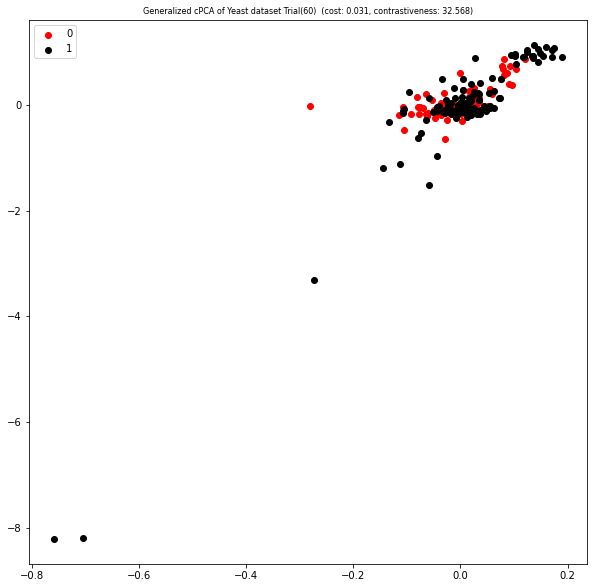

(2, 3, 7)
[1, 4, 5, 6, 8]
[[-7.66478371e-01 -6.08588475e-01]
 [-1.37518188e-01 -8.90102910e-02]
 [-2.36360762e-01 -2.06932855e-01]
 [-1.05222722e-01 -1.93522948e-01]
 [-2.42849110e-01 -1.87459499e-01]
 [-1.74639735e-01 -1.52760343e-01]
 [-2.11257230e-01 -1.37967527e-01]
 [-2.85896478e-01 -2.05038706e-01]
 [ 2.64514508e-02  5.69514581e-02]
 [-3.00884547e-01 -1.67877406e-01]
 [-1.51130694e-01 -1.36564186e-01]
 [-3.01377360e-01 -1.82351491e-01]
 [-1.23571220e-01 -1.06935693e-01]
 [-3.80310314e-01 -2.74681877e-01]
 [-4.02322268e-01 -2.71049042e-01]
 [-3.16227539e-01 -2.54836814e-01]
 [-3.53462960e-01 -2.06649620e-01]
 [-3.05463225e-01 -2.99114229e-01]
 [-4.93517947e-01 -3.66678458e-01]
 [-2.50615889e-01 -1.07151783e-01]
 [-2.57426018e-01 -2.44438200e-01]
 [-3.26086260e-01 -2.71081156e-01]
 [-2.06001217e-01 -1.67499676e-01]
 [-2.67885246e-01 -1.25585320e-01]
 [-1.56420299e-01 -1.26568369e-01]
 [-1.85878831e-01 -9.25654510e-02]
 [-9.39799894e-02 -1.00503712e-01]
 [-2.22569911e-01 -2.18200559

<Figure size 432x288 with 0 Axes>

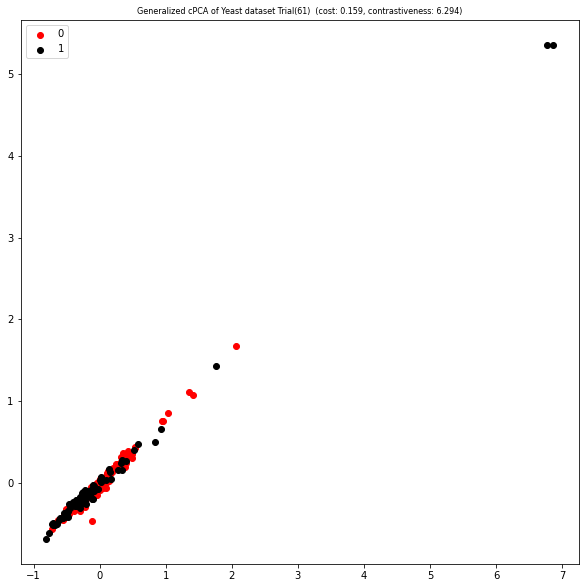

(2, 3, 8)
[1, 4, 5, 6, 7]


In [ ]:
for index in range(len(partitions)):
    Trials(partitions[index],index+1)
